<a href="https://colab.research.google.com/github/JuanSol26/Data-Science-3---Solinas-Juan/blob/main/Data_Science_3_Solinas_Juan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis de Reseñas de Series y Películas**

#Por Juan Solinas

#**Motivación y audiencia**

En el siguiente notebook se hará una revisión de una bases de dato con reseñas correspondientes a diversas series y películas. El objetivo es diagramar un análisis que pueda describir ciertos patrones en cuanto al género de series y películas que tienden a ser calificadas de manera positiva.

Además, se intentara encontrar patrones de los elementos que más importan a la hora de evaluar los contenidos audiovisuales de los últimos tiempos.

Finalmente, se desarrollara un modelo para predecir calificaciones en función de lo indicado en las reseñas, con miras a automatizar el proceso de evaluación de las críticas a las series y películas.

Este notebook podría ser conveniente para asesorar a plataformas de streaming, como forma de asesorarlos con respecto a lo más conveniente a la hora de invertir en nuevas series y películas, así como también podría ser util para investigaciones de mercado.

El dataset es una versión reducida manualmente de la siguiente fuente:

https://www.kaggle.com/datasets/andrsmosquera/crticas-pelculas-filmaffinity-en-espaol-netflix?resource=download

#**Hipotesis**

La hipotesis de este notebook es que las películas y series drámaticas tienden a ser mejor valoradas que otros géneros.

Adicionalmente, se intentara comprobar si hay ciertos actores que por si mismos puedan justificar valoraciones positivas.

# Variables del Notebook

**Dataframes**

**reviews**: Dataframe conformado con el dataset original.

**reviews2**: Dataframe duplicado para hacer modificaciones en diferentes columnas

**reviews2_top**: DataFrame con el top 15 de series o películas con mejor puntaje

**reviews2_los**: DataFrame con el top 15 de series o películas con peor puntaje

**reviews_pos**: Dataframe con las reseñas de sentimiento positivo

**reviews_neut**: Dataframe con las reseñas de sentimiento neutral

**reviews_neg**: Dataframe con las reseñas de sentimiento negativo

**reviews_pos**: Dataframe con las reseñas con una calificación mayor a 6

**reviews_neg**: Dataframe con las reseñas con una calificación menor a 7

**rev_pos_top**: Dataframe con las 100 series y películas mejor rankeadas

**rev_pos_neg**: Dataframe con las 100 series y películas peor rankeadas

**reviews_3**: DataFrame creado para extraer las variables del modelo de regresión logistica

**df_coef_bow**: DataFrame con el indice y coeficientes del BoW creado con las reseñas

**df_coef**: DataFrame con el coeficiente del vocabulario TF-IDF


---

**Variables originales del DataFrame**

**film_name**: Nombre de la serie o película

**gender**: Tipo de género de la serie o película

**film_avg_rate**: Promedio de puntuación de la serie o película contabilizando las diferentes reseñas

**review_rate**: Puntuación en la reseña de la serie o película

**review_title**: Titulo que se le asigno a la reseña

**review_text**: Cuerpo textual de la reseña

---

**Variables agregadas al DataFrame original**

**Género 1**: Modificación del género de la serie o película para que haya un único valor

**Reseñas**: Columna donde se genera la tokenización de las reseñas que contiene el dataset

**Reseñas_string**: Columna que convierte a la variable "Reseñas" en string, para unirlos con un espacio, con el objetivo de diagramar un wordcloud con bigramas.

**Calificación**: Columna que contiene las calificaciones de las reseñas

---

**Variables**

**colors2**: Variable con una paleta de colores

**c_gen**: Variable para contar la cantidad de reseñas por género

**gen_ind**: Indice para asignar a la cantidad de películas por género

**nlp**: Variable asignada con la libreria Spacy, en lenguaje español

**spacy_stopwords**: Variable con el listado de stopwords de la librería spacy

**stopwords_es**: Variable con el listado de stopwords de la librería NLTK

**stemmer**: Variable asignada con SnowballStemmer en español, para poder aplicar el stemming

**blob**: Variable asignada para importar TextBlob

**rev_pos**: Variable para detectar la cantidad de reseñas con una nota mayor a 7

**rev_neg**: Variable para detectar reseñar con una nota menor a 5

**text**: Variable para unir las reseñas y poder diseñar una WordCloud

**WordCloud**: Variable para generar una Wordcloud

**vectorizer**: Variable para generar un Vectorizador, con el objetivo de diagramar una WordCloud con Bigramas

**X_bigrama_1**: Variable que transforma el texto de la columna "reseñas_string" en n-gramas

**n_grams**¨: Variable para extraer los n_gramas

**frequencies_1**: Variable con las frecuencias del primer wordcloud con bigramas

**text2**: Variable para unir las diferentes reseñas positivas, para diagramar un WordCloud

**count_gen_pos**: Variable para contar la cantidad de películas por género de las reseñas positivas

**gen_pos**: Indice de la cantidad de películas por género del DataFrame de reseñas positivas

**X_big_2**: Vectorizador para transformar la columna de reseñas string en n-gramas, en el dataframe de reseñas positivas

**textos_pos**: Serie de texto creada para incluir todas las reseñas positivas en una única serie

**count_pos**: contador de las 15 palabras que más comúnes en textos_pos

**text3**: Variable para unir las reseñas negativas y poder diseñar una WordCloud

**count_gen_neg**: Variable para contar la cantidad de películas por género de las reseñas negativas

**gen_neg**: Indice de la cantidad de películas por género del DataFrame de reseñas negativas

**X_big_3**: Vectorizador para transformar la columna de reseñas string en n-gramas, en el dataframe de reseñas negativas

**n_grams_freq**: Diccionario creado para las diferentes WordClouds, con el n-grama y sus frecuencias.

**textos_neg**: Serie de texto creada para incluir todas las reseñas neg en una única serie

**count_neg**: contador de las 15 palabras que más comúnes en textos_neg

**count_top**: Variable para contar la cantidad de reseñas por género en **rev_pos_top**

**gen_top**: Variable para generar un indice a **count_top**  

**text4**: Variable para unir todas las reseñas del top 100 de películas y series mejor rankeadas, con el fin de diagramar el wordcloud

**X_big_4**: Variable para crear la columna reseñas_string en rev_pos_top y así crear el vectorizador para diagramar el Wordcloud con Bigramas

**txt_pos_100**: Serie para unir todas las reseñas del top 100 de reseñas positivas

**count_pos_100**: Contador de las 100 palabras más comúnes en el top 100 de reseñas positivas

**count_top_neg**: Variable para contar la cantidad de casos por género en el top 100 de reseñas negativas

**gen_top_neg**: Indice de **count_top_neg**

**text5**: Variable para unir todas las reseñas del top 100 de reseñas negativas

**pal_top_100**: Variable para gráficar las palabras más comúnes en el top 100 de reseñas positivas

**frec_top_100**: Variable para gráficar las frecuencias de las palabras más comúnes en el top 100 de reseñas positivas

**pal_neg_top_100**: Variable para gráficar las palabras más comúnes en el top 100 de reseñas negativas

**frec_neg_top_100**: Variable para gráficar las frecuencias de las palabras más comúnes en el top 100 de reseñas negativas

**X_big_5**: Variable para crear la columna reseñas_string en rev_pos_neg y así crear el vectorizador para diagramar el Wordcloud con Bigramas

**txt_neg_100**: Serie creada para unir todas las reseñas del top 100 de reseñas negativas

**count_neg_100**: Contador de las 100 palabras más comúnes en el top 100 de reseñas negativas

**X**: Variable X del modelo de regresión logistica, con la columna tokenizada de reseñas

**y**: Variable y del modelo de regresión logística, con la columna binaria númerica de calificación de la reseña

**X_train, X_test, y_train, y_test**: Variables para la validación simple del modelo de regresión logística

**vectorizador_bow**: variable con el vectorizador del Bag of Words

**X_train_bow**: Vectorizador para entrenar el bag of words con la variable **X_train**

**X_test_bow**: Vectorizador para entrenar el bag of words con la variable **X_test**

**S_kfold**: Variable con la validación cruzada de los modelos de regresión logística

**reg_log_bow**: Modelo de regresión logística ajustado al Bag of Words

**y_pred_train_bow**: Predicción de la variable y_train con el modelo de regresión logistica del BoW

**y_pred_test_bow**: Predicción de la variable y_test con el modelo de regresión logistica del BoW

**cm**: Variable asignada a las diferentes matrices de confusión

**palabras_bow**: Palabras del vocabulario creado con BoW

**coeficientes_bow**: Coeficientes de cada una de las palabras del BoW

**reseña_1**: Primer reseña de prueba para probar el modelo de regresión logistica con el vectorizador BoW

**nueva_reseña_bow**: Vectorizador para transformar la reseña_1 y adecuarla al BoW

**predicción**: Predicción con la regresión logísitca

**prob_positiva**: Probabilidad de la predicción

**probabilidad**: Ajuste de la probabilidad de la predicción de **prob_positiva** entre 0 y 1

**reseña_2**: segunda reseña de prueba para probar el modelo de regresión logistica con el vectorizador BoW

**nueva_reseña_bow_2**: Vectorizador para transformar la reseña_2 y adecuarla al BoW

**predicción_2**: Predicción con la regresión logísitca ajustada al BoW de la reseña_2

**prob_negativa**: Probabilidad de la predicción, midiendo la categoría de aprobación

**probabilidad**: Ajuste de la probabilidad de la predicción de **prob_negativa** entre 0 y 1

**vectorizador_tfidf**: Vectorizador de TF-IDF

**X_train_tfidf**: Vectorizador tf-idf entrenando la variable **X_train**

**X_test_tfidf**: Vectorizador tf-idf entrenando la variable **X_test**

**modelo_rl**: Modelo de regresión logistica

**reg_log_tf_idf**: Mejor modelo de regresión logistica encontrado por HalvingGridSearchCV

**modelo_tfidf**: Modelo entrenado de regresión logística, ajustado a **X_train_tfidf**

**y_pred_tfidf_train**: Predicción del modelo_tfidf para los datos de entrenamiento

**y_pred_tfidf_test**: Predicción del modelo_tfidf para los datos de testeo

**palabras_tf**: Palabras del vocabulario de TF-IDF

**coeficientes_tf**: Coeficientes del vocabulario de TF-IDF

**reseña_3**: Reseña positiva para probar modelo con TF-IDF

**nueva_reseña_tf_idf_1**: Vectorizador tf-idf para ajustar la nueva reseña

**predicción_3**: Predicción con el modelo tf-idf de la nueva reseña de prueba

**reseña_4**: Reseña negativa para probar modelo con TF-IDF

**nueva_reseña_tf_idf_2**: Vectorizador tf-idf para ajustar la nueva reseña

**predicción_4**: Predicción con el modelo tf-idf de la nueva reseña de prueba


---

**Funciones**

**gen**: Función para contabilizar como género a la categoría "Serie de TV"

**stemming**: Función para aplicar stemming en un listado de tokens

**sent**: Función creada para clasificar el sentimiento de las reseñas

**cal**: Función creada para definir una calificación binaria en función de las diferentes puntuaciones de las reseñas

**clas**: Función para crear una columna binaria númerica de aprobación y desaprobación de las reseñas

# **Estructura**

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")
pd.set_option('display.max_colwidth', None)

In [254]:
url_1 = "https://github.com/JuanSol26/Data-Science-3---Solinas-Juan/raw/refs/heads/main/Ds%203.xlsx"

reviews = pd.read_excel(url_1)

In [255]:
reviews.head()

film_name                        gender  film_avg_rate  \
0  Respira (Serie de TV)  Serie de TV, Drama, Medicina            4.6   
1  Respira (Serie de TV)  Serie de TV, Drama, Medicina            4.6   
2  Respira (Serie de TV)  Serie de TV, Drama, Medicina            4.6   
3  Respira (Serie de TV)  Serie de TV, Drama, Medicina            4.6   
4  Respira (Serie de TV)  Serie de TV, Drama, Medicina            4.6   

   review_rate                         review_title  \
0            1                              Respira   
1            2  Esta serie te llama tonto a la cara   
2            1                              Respira   
3            1             Imposible, no hay manera   
4            1                        Serie nefasta   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               review_text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Como fan de las series españolas y de Najwa, esto duele, la serie es muy mala.Manu Ríos da para lo que da, enseñar cacho, Najwa hace de mala, papel repetido que no aporta ninguna capa nueva.Telenovela de mediodía con un guión mediocre y diálogos planos.En aspectos técnicos como fotografía, sonido, también deja que desear.Lo peor de Carlos Montero, de largo.  
1                                                                                                 Todo lo malo que puede tener una serie lo posee "Respira". Los diálogos son penosos, los personajes son puras caricaturas, las tramas se ven venir de lejos y los actores... Pues las tres caras de siempre, ninguna de las cuales sabe vocalizar, y luego las cuotas que tocan y para casa. Aitana, maja, ¿Qué haces metida aquí?En estos días también estoy viendo la segunda temporada de "La edad dorada" y no es por comparar, pero voy a hacerlo. Esa también es una serie ligera que no viene a salvar el mundo, pero es que no hay ápice posible de similitud. En ningún sentido. Aquí no hay nada cuidado. Es pura basura cuyos implicados, todos sin excepción, saben positivamente que lo es.Y yo, que suelo tener el estómago hecho a todo, me he sentido ofendido viendo "Respira". Me he sentido insultado. Tonto de baba.  
2                                                                                                                                                                                                                                                                                                                                                           La serie es un drama médico que intenta "copiar" los estilemas yankies adaptándolos al modo español.La historia de base transcurre en un hospital valenciano representado 

In [256]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5073 entries, 0 to 5072
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   film_name      5073 non-null   object 
 1   gender         5073 non-null   object 
 2   film_avg_rate  5073 non-null   float64
 3   review_rate    5073 non-null   int64  
 4   review_title   5073 non-null   object 
 5   review_text    5073 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 237.9+ KB


Se puede ver en el DataFrame que no hay datos nulos

In [257]:
np.sort(reviews.film_name.unique())

array(['(Des)encanto (Serie de TV)', '10 días de un mal hombre ',
       '1670 (Serie de TV)', '60 minutos ',
       'A la caza de espíritus malignos (Serie de TV)',
       'A la caza del asesino (Serie de TV)', 'A través de tu mirada ',
       'A través del mar ',
       'ARA San Juan: El submarino que desapareció (Serie de TV)',
       'Accidente (Serie de TV)', 'Adiós, Tierra (Serie de TV)',
       'Agencia Bien de amores ', 'Agente Stone ', 'Al borde del abismo ',
       'Alejandro Magno: La creación de un dios (Serie de TV)',
       'American Symphony ', 'Amor en aguas turbulentas ',
       'Amor, acoso, asesinato ', 'Amy Schumer: Emergency Contact (TV)',
       'Antares de la Luz: La secta del fin del mundo ',
       'Antracita (Serie de TV)',
       'Aquellos maravillosos 90 (Serie de TV)', 'As bestas ',
       'Asesinato para principiantes (Miniserie de TV)', 'Atlas ',
       'Atrapaalmas ', 'Avatar: La leyenda de Aang (Serie de TV)',
       'Baby Bandito (Serie de TV)', 'Baila

In [258]:
reviews.film_name.value_counts()

film_name
La sociedad de la nieve                          271
As bestas                                        246
The Witcher (Serie de TV)                        156
Cazafantasmas: Más allá                          122
El asesino                                       119
                                                ... 
El príncipe que nunca reinó (Miniserie de TV)      1
Ōoku: Los aposentos privados (Serie de TV)         1
iNumber Number: El oro de Johannesburgo            1
A la caza del asesino (Serie de TV)                1
Príncipes salvajes                                 1
Name: count, Length: 438, dtype: int64

En este recuento se puede observar que no hay películas o series duplicadas por errores de tipeo, así como en las 5073 reseñas se reparten 438 series/películas.

In [259]:
reviews["gender"].value_counts()

gender
Drama, Aventuras, Basado en hechos reales, Supervivencia, Naturaleza, Años 70, Zonas frías/polares, Escenario único    271
Thriller, Drama, Vida rural                                                                                            246
Serie de TV, Fantástico, Aventuras, Fantasía medieval, Brujería, Videojuego                                            156
Fantástico, Comedia, Sobrenatural, Fantasmas, Secuela                                                                  122
Thriller, Intriga, Crimen, Cómic                                                                                       119
                                                                                                                      ... 
Serie de TV, Documental, Crimen, True Crime                                                                              1
Acción, Aventuras, Policíaco                                                                                             1
Serie de TV, Animación, Fantástico, Drama, Manga                                                                         1
Serie de TV, Documental, Miniserie de TV, True Crime                                                                     1
Documental, Inteligencia artificial                                                                                      1
Name: count, Length: 406, dtype: int64

Lo que se puede observar es que varias reseñas clasifican con más de un género a las películas a las que destinan su crítica. Es por ello que se procedera a crear una columna nueva donde se incluya solo el primer género indicado por los diferentes reseñistas.

In [260]:
#creación de dataset para dividir a los diferentes géneros de cáda película
reviews2 = reviews.gender.str.split(',', expand=True)
reviews2.columns= ["Género 1", "Género 2", "Género 3", "Género 4", "Género 5", "Género 6", "Género 7", "Género 8", "Género 9", "Género 10","Género 11","Género 12", "Género 13"]

In [261]:
#incorporación de una columna con el nombre de la Serie/Película al DataFrame para dividir los géneros de cada película
reviews2["Nombre"] = reviews.film_name
reviews2 = reviews2.set_index("Nombre")

In [262]:
#Creación de una función para no contabilizar como género a la codificación "Serie de TV"
def gen(x):
    if x == "Serie de TV":
      return "None"
    else:
        return x

In [263]:
reviews2["Género 1"]= reviews2["Género 1"].apply(gen)

In [264]:
#Se aplica la función mask para que, en caso de que el género de la primer columna de reviews 2 indique "None", se copie el valor de la columna "Género 2"
reviews2["Género 1"] = reviews2["Género 1"].mask(
    reviews2["Género 1"] == "None",
    reviews2["Género 2"]
)

In [265]:
reviews2['Género 1'].str.strip()

Nombre
Respira (Serie de TV)                                  Drama
Respira (Serie de TV)                                  Drama
Respira (Serie de TV)                                  Drama
Respira (Serie de TV)                                  Drama
Respira (Serie de TV)                                  Drama
                                                     ...    
Baraja: la firma del asesino (Miniserie de TV)    Documental
Baraja: la firma del asesino (Miniserie de TV)    Documental
Baraja: la firma del asesino (Miniserie de TV)    Documental
Baraja: la firma del asesino (Miniserie de TV)    Documental
Baraja: la firma del asesino (Miniserie de TV)    Documental
Name: Género 1, Length: 5073, dtype: object

In [266]:
reviews2['Género 1'].unique()

array([' Drama', 'Terror', ' Comedia', ' Animación', 'Drama', 'Comedia',
       ' Thriller', 'Animación', ' Terror', 'Acción', 'Documental',
       ' Romance', ' Documental', ' Fantástico', 'Ciencia ficción',
       ' Intriga', 'Fantástico', 'Thriller', 'Romance', ' Acción',
       ' Ciencia ficción', ' Aventuras', 'Aventuras', 'Intriga',
       'Infantil'], dtype=object)

In [267]:
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Ciencia ficción', 'Ciencia ficción')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Aventuras', 'Aventuras')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Comedia', 'Comedia')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Animación', 'Animación')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Thriller', 'Thriller')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Drama', 'Drama')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Terror', 'Terror')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Documental', 'Documental')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Fantástico', 'Fantástico')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Romance', 'Romance')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Intriga', 'Intriga')
reviews2['Género 1'] = reviews2['Género 1'].str.replace(' Acción', 'Acción')

In [268]:
reviews2['Género 1'].unique()

array(['Drama', 'Terror', 'Comedia', 'Animación', 'Thriller', 'Acción',
       'Documental', 'Romance', 'Fantástico', 'Ciencia ficción',
       'Intriga', 'Aventuras', 'Infantil'], dtype=object)

Se hacen modificaciones en el nombre del género para que no se repitan diferentes categorías

In [269]:
reviews2["Género 1"] = reviews2["Género 1"]
reviews2 = reviews2.reset_index(drop=True)

reviews["Género 1"] = reviews2["Género 1"]

In [270]:
reviews.drop("gender", axis=1, inplace=True)
reviews.head()

film_name  film_avg_rate  review_rate  \
0  Respira (Serie de TV)            4.6            1   
1  Respira (Serie de TV)            4.6            2   
2  Respira (Serie de TV)            4.6            1   
3  Respira (Serie de TV)            4.6            1   
4  Respira (Serie de TV)            4.6            1   

                          review_title  \
0                              Respira   
1  Esta serie te llama tonto a la cara   
2                              Respira   
3             Imposible, no hay manera   
4                        Serie nefasta   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               review_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Como fan de las series españolas y de Najwa, esto duele, la serie es muy mala.Manu Ríos da para lo que da, enseñar cacho, Najwa hace de mala, papel repetido que no aporta ninguna capa nueva.Telenovela de mediodía con un guión mediocre y diálogos planos.En aspectos técnicos como fotografía, sonido, también deja que desear.Lo peor de Carlos Montero, de largo.   
1                                                                                                 Todo lo malo que puede tener una serie lo posee "Respira". Los diálogos son penosos, los personajes son puras caricaturas, las tramas se ven venir de lejos y los actores... Pues las tres caras de siempre, ninguna de las cuales sabe vocalizar, y luego las cuotas que tocan y para casa. Aitana, maja, ¿Qué haces metida aquí?En estos días también estoy viendo la segunda temporada de "La edad dorada" y no es por comparar, pero voy a hacerlo. Esa también es una serie ligera que no viene a salvar el mundo, pero es que no hay ápice posible de similitud. En ningún sentido. Aquí no hay nada cuidado. Es pura basura cuyos implicados, todos sin excepción, saben positivamente que lo es.Y yo, que suelo tener el estómago hecho a todo, me he sentido ofendido viendo "Respira". Me he sentido insultado. Tonto de baba.   
2                                                                                                                                                                                                                                                                                                                                                           La serie es un drama médico que intenta "copiar" los estilemas yankies adaptándolos al modo español.La historia de base transcurre en un hospital valenciano representado de manera inverosímil pues el ambiente de hospital representado en la serie dista mucho de la realidad hospitalaria tanto valenciana como española.El guión entremezcla dramas mé

Se le agrego la columna de género de reviews 2 al DataFrame original y se elimino la columna original del DataFrame que tenía diversas categorías agrupadas en una única columna

In [271]:
#se pasa a minúsculas a la columnna de reseñas y de género del DataFrame original
reviews["review_text"] = reviews["review_text"].str.lower()
reviews["Género 1"] = reviews["Género 1"].str.lower()

# **EDA Estadistico**

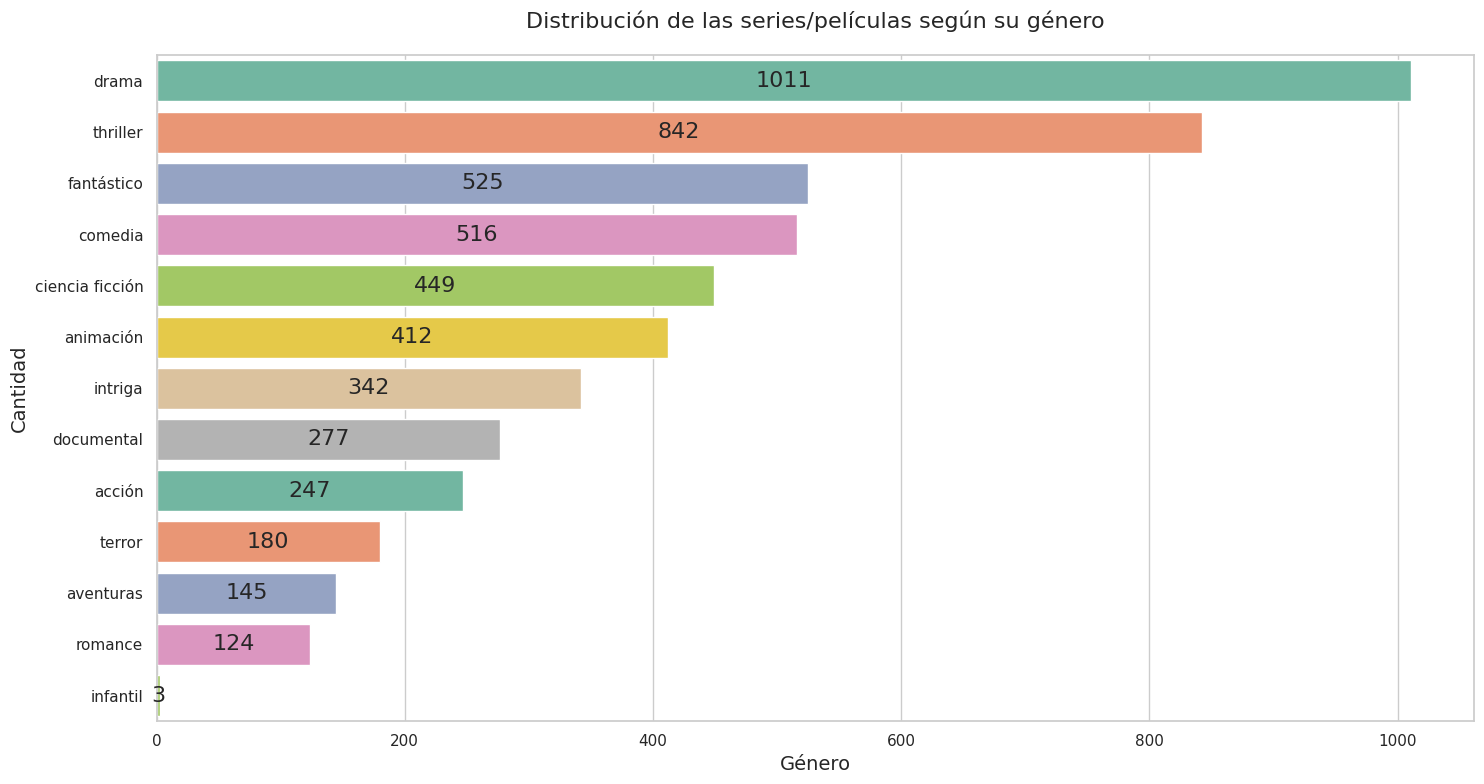

In [272]:
#variable de paleta de colores
colors2 = sns.color_palette("Set2")

#Creación de una variable para contar la cantidad de péliculas por género así como para extraer su index
c_gen = reviews["Género 1"].value_counts()
gen_ind = c_gen.index  # Usar el índice ordenado de value_counts()


sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))


ax = sns.barplot(
    x=c_gen,
    y=gen_ind,
    palette=colors2)


plt.xlabel("Género", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.title("Distribución de las series/películas según su género", fontsize=16, pad=20)

for container in ax.containers:
    ax.bar_label(container, fontsize=16, label_type="center")


plt.tight_layout()

plt.show()

Lo que se observa en este gráfico es que la mayor parte de las series y películas reseñadas pertenecen a los géneros de Drama, Thriller, Fantastico, Comedia y Ciencia Ficción.

Adicionalmente, hay muy pocas series y películas en este dataset que pertenezcan al género Romance, al de Aventuras y al de Terror. Prácticamente ninguna de las reseñas se le dedico al género infatil

In [273]:
#se eliminan duplicados del review 2 y se corrobora el resultado
reviews2 = reviews[["film_name", 'film_avg_rate',"Género 1"]].drop_duplicates().reset_index(drop=True)

reviews2.head()

film_name  film_avg_rate   Género 1
0          Respira (Serie de TV)            4.6      drama
1                 La liberación             4.5     terror
2             Kaos (Serie de TV)            6.4    comedia
3  Terminator Zero (Serie de TV)            5.9  animación
4            Príncipes salvajes             4.8      drama

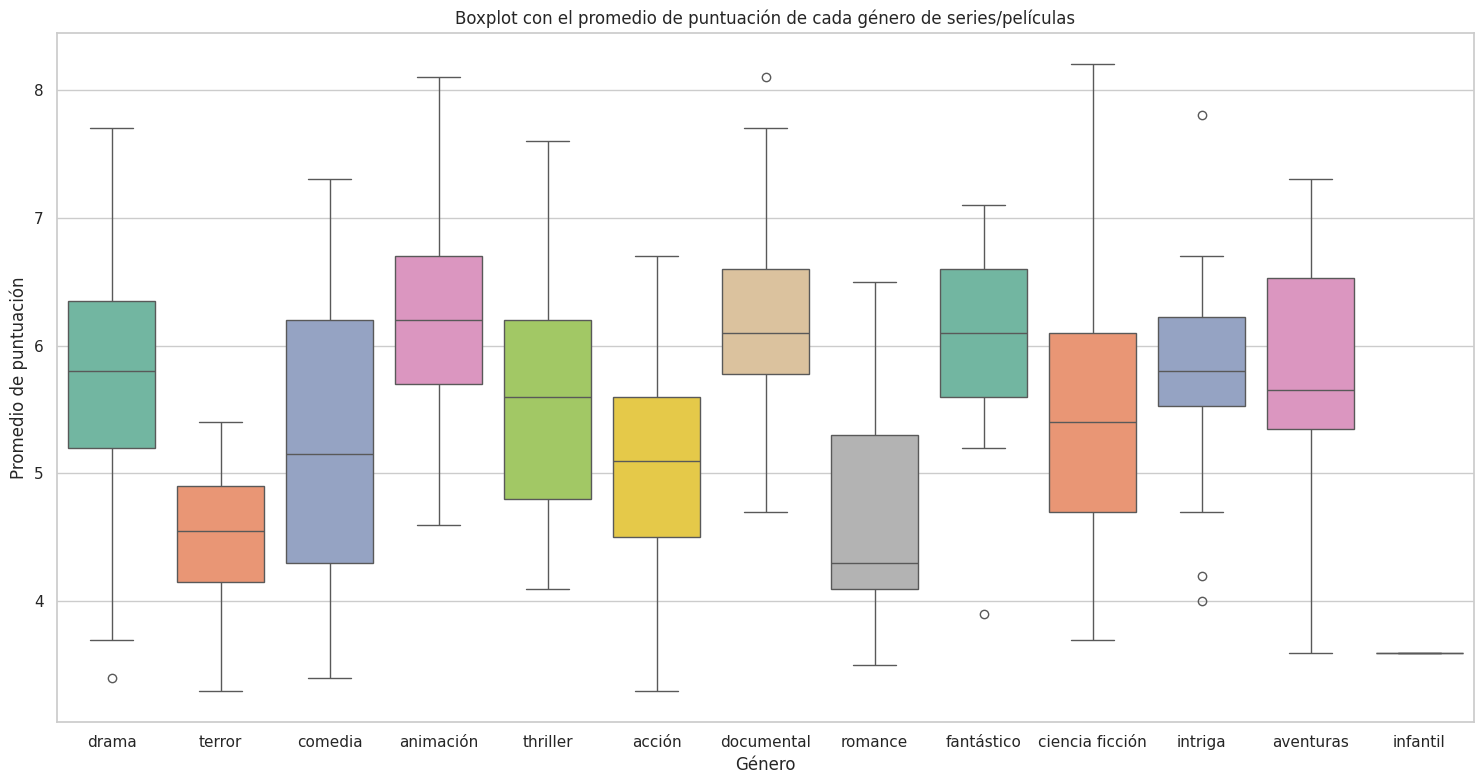

In [274]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=reviews2,
            x="Género 1",
            y= 'film_avg_rate',
            palette=colors2)

plt.xlabel("Género")
plt.ylabel("Promedio de puntuación")
plt.title("Boxplot con el promedio de puntuación de cada género de series/películas")

plt.tight_layout()
plt.show()

Teniendo en cuenta el gráfico anterior se puede decir que las puntuaciones del género terror son excesivamente bajas, con un 75% de los casos por debajo de un promedio de 5 puntos. Aunque esto puede ser debido a la poca cantidad de reseñas que tiene este género.

Algo similar se podría decir del género Drama y del género comedia, que tienen un 50% de los casos por debajo de los 6 puntos, aunque estos géneros si tienen un importante caudal de casos.

Cabe resaltar además el puntaje de las series y peliculas del género de Animación y del género Fantastico, que tienen un 50% de los casos por encima de los 6 puntos.


In [275]:
#listado de las 15 series o péliculas con mejor puntaje
reviews2_top = reviews2.sort_values(by="film_avg_rate", ascending=False).head(15)
reviews2_top

film_name  film_avg_rate  \
429                               Black Mirror (Serie de TV)            8.2   
274                     Samurái de ojos azules (Serie de TV)            8.1   
431                     Nuestro planeta II (Miniserie de TV)            8.1   
129                                 Ripley (Miniserie de TV)            7.8   
435     Este mundo no me hará mala persona (Miniserie de TV)            7.8   
266                                  The Crown (Serie de TV)            7.7   
239  La II Guerra Mundial: Desde el frente (Miniserie de TV)            7.7   
213                                 La sociedad de la nieve             7.6   
68                                                As bestas             7.6   
311      JoJo’s Bizarre Adventure: Golden Wind (Serie de TV)            7.6   
241                                      Hilda (Serie de TV)            7.5   
344                                    Top Boy (Serie de TV)            7.5   
291                                  Pluto (Miniserie de TV)            7.4   
293                 La vida en nuestro planeta (Serie de TV)            7.4   
392                             La inspiración más profunda             7.3   

            Género 1  
429  ciencia ficción  
274        animación  
431       documental  
129          intriga  
435        animación  
266            drama  
239       documental  
213            drama  
68          thriller  
311        animación  
241        animación  
344            drama  
291        animación  
293       documental  
392       documental

In [276]:
#listado de las 15 series o péliculas con peor puntaje
reviews2_los = reviews2.sort_values(by="film_avg_rate", ascending=True).head(15)
reviews2_los

film_name  film_avg_rate   Género 1
372                                Atrapaalmas             3.3     acción
271                              V de venganza             3.3     terror
292               El lado dulce de la traición             3.4      drama
37                          La familia Benetón             3.4    comedia
225                    Mi cuñado es un vampiro             3.4    comedia
298                           Disco Inferno (C)            3.5     terror
413                           A través del mar             3.5    romance
398  Don Cochecito y los caballeros templarios             3.6  aventuras
325                     Spy Kids: El armagedón             3.6   infantil
97                        La madre de la novia             3.6    romance
264                 Mejor Navidad, ¡imposible!             3.6    comedia
178               Mátame si te atreves, cariño             3.6    comedia
276                       Vacaciones de verano             3.7    comedia
165                                  Mea culpa             3.7      drama
350         El club de los lectores criminales             3.7     terror

# **Tokenización y stopwords**

In [277]:
from string import punctuation
import re

In [278]:
#instalación de spacy
!python -m spacy download es_core_news_md
import spacy
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 19.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [279]:
#creación de listado de stopwords con Spacy
nlp = spacy.load("es_core_news_md")

nlp.Defaults.stop_words
spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS

In [280]:
#inserción de nuevas palabras al listado de stopwords de Spacy
spacy_stopwords.update([".", ",", "!", "¡", ";", "-", "+", "/", "*","(" ")", "[","]", "`", "´", "`", "serie", "película", "si", "?", "¿", "´", "``", "quizá", "film", "bien", "aunque", "tan", "aún", "aun", "que",
    # Artículos
    'el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unas', 'lo', 'al', 'del', "aun", "que"

    # Pronombres
    'yo', 'me', 'mi', 'mí', 'conmigo', 'tú', 'te', 'ti', 'contigo', 'él', 'le', 'lo',
    'ella', 'la', 'ello', 'nosotros', 'nos', 'nosotras', 'vosotros', 'vosotras', 'os',
    'ellos', 'ellas', 'les', 'los', 'las', 'se', 'si', 'consigo', "blanco", "negro",

    # Preposiciones
    'a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 'durante', 'en',
    'entre', 'hacia', 'hasta', 'mediante', 'para', 'por', 'según', 'sin', 'so',
    'sobre', 'tras',

    # Conjunciones
    'y', 'o', 'pero', 'aunque', 'mas', 'sin embargo', 'porque', 'pues', 'si', 'como',
    'que', 'cuando', 'mientras', 'donde', 'así que', 'ni', 'sino', 'tanto', 'como',

    # Adverbios comunes
    'muy', 'mucho', 'poco', 'bastante', 'demasiado', 'más', 'menos', 'algo', 'casi',
    'solo', 'solamente', 'tan', 'tanto', 'todo', 'nada', 'aquí', 'ahí', 'allí',
    'cerca', 'lejos', 'antes', 'después', 'ahora', 'luego', 'siempre', 'nunca',
    'también', 'tampoco', 'ya', 'todavía', 'aún', "capítulo", "episodio"

    # Verbos comunes (infinitivos)
    'ser', 'estar', 'haber', 'tener', 'hacer', 'poder', 'decir', 'ir', 'ver',
    'dar', 'saber', 'querer', 'llegar', 'dejar', 'seguir', 'poner', 'parecer',

    # Palabras vacías adicionales
    'etc', 'etcétera', 'tal', 'cual', 'cuales', 'cuál', 'cuáles', 'cuyo', 'cuya', "cine", "cosa", "lo"
    'cuyos', 'cuyas', 'este', 'esta', 'estos', 'estas', 'ese', 'esa', 'esos',
    'esas', 'aquel', 'aquella', 'aquellos', 'aquellas', 'otro', 'otra', 'otros',
    'otras', 'alguno', 'alguna', 'algunos', 'algunas', 'ninguno', 'ninguna',
    'varios', 'varias', 'muchos', 'muchas', 'pocos', 'pocas', 'cada', "cosa", "cosas", "película", 'sendos', "nada", "nadie", "aunque", " aunque", "aunque ",
])

In [281]:
#importanción y descarga de la librería NLTK
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [282]:
#Inserción de listado de palabras a los stopwords de NLTK
stopwords_es = set(stopwords.words('spanish'))
stopwords_es.update([ "serie", "película", "si", "?", "¿", "´", "``", "quizá", "film", "bien", "aunque", "tan", "aún", "aun", "que",
    # Artículos
    'el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unas', 'lo', 'al', 'del', "aun", "que", "*.*", "*."


    'yo', 'me', 'mi', 'mí', 'conmigo', 'tú', 'te', 'ti', 'contigo', 'él', 'le', 'lo',
    'ella', 'la', 'ello', 'nosotros', 'nos', 'nosotras', 'vosotros', 'vosotras', 'os',
    'ellos', 'ellas', 'les', 'los', 'las', 'se', 'si', 'consigo',


    'a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 'durante', 'en',
    'entre', 'hacia', 'hasta', 'mediante', 'para', 'por', 'según', 'sin', 'so',
    'sobre', 'tras', "blanco", "negro",


    'y', 'o', 'pero', 'aunque', 'mas', 'sin embargo', 'porque', 'pues', 'si', 'como',
    'que', 'cuando', 'mientras', 'donde', 'así que', 'ni', 'sino', 'tanto', 'como',


    'muy', 'mucho', 'poco', 'bastante', 'demasiado', 'más', 'menos', 'algo', 'casi',
    'solo', 'solamente', 'tan', 'tanto', 'todo', 'nada', 'aquí', 'ahí', 'allí',
    'cerca', 'lejos', 'antes', 'después', 'ahora', 'luego', 'siempre', 'nunca',
    'también', 'tampoco', 'ya', 'todavía', 'aún', "capítulo", "episodio"


    'ser', 'estar', 'haber', 'tener', 'hacer', 'poder', 'decir', 'ir', 'ver',
    'dar', 'saber', 'querer', 'llegar', 'dejar', 'seguir', 'poner', 'parecer', "películas",


    'etc', 'etcétera', 'tal', 'cual', 'cuales', 'cuál', 'cuáles', 'cuyo', 'cuya', "cine", "series", "cosa", "lo"
    'cuyos', 'cuyas', 'este', 'esta', 'estos', 'estas', 'ese', 'esa', 'esos',
    'esas', 'aquel', 'aquella', 'aquellos', 'aquellas', 'otro', 'otra', 'otros',
    'otras', 'alguno', 'alguna', 'algunos', 'algunas', 'ninguno', 'ninguna',
    'varios', 'varias', 'muchos', 'muchas', 'pocos', 'pocas', 'cada', "cosa", "cosas", "película", 'sendos', "nada", "nadie", "aunque", " aunque", "aunque ",
])

In [283]:
#inserción de listado de puntuaciones a los stopwords de NLTK
stopwords_es.update(list(punctuation))

In [284]:
#remplazo de los signos con espacios vaciós para evitar que no sean eliminados con los stopwords
#además, se remplaza la palabra "guion" por "guión"
reviews["review_text"] = reviews["review_text"].str.replace(r'\.', ' . ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\¿', ' ¿ ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\?', ' ? ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\!', ' ! ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\¡', ' ! ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\,', ' , ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\:', ' : ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\;', ' ; ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\(', ' ( ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\)', ' ) ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'\-', ' - ', regex=True)
reviews["review_text"] = reviews["review_text"].str.replace(r'guion', 'guión', regex=True)

In [285]:
#aplicación de la tokenización
reviews["Reseñas"] = reviews["review_text"].apply(lambda x: word_tokenize(x, language='spanish'))

In [286]:
#aplicación de los stopwords de spacy y NLTK, así como la exclusi´n de todas las palabras que no tengan más de 4 letras
reviews["Reseñas"] = reviews["Reseñas"].apply(lambda x: [token for token in x if token not in stopwords_es])
reviews["Reseñas"] = reviews["Reseñas"].apply(lambda x: [token for token in x if token not in spacy_stopwords])
reviews["Reseñas"] = reviews["Reseñas"].apply(lambda x: [token for token in x if len(token) > 4])

In [287]:
reviews['Reseñas'].head()

0                                                                                                                                                                                                                                                                                                                                                                         [españolas, najwa, duele, enseñar, cacho, najwa, papel, repetido, aporta, telenovela, mediodía, guión, mediocre, diálogos, planos, aspectos, técnicos, fotografía, sonido, desear, carlos, montero]
1                                                                                                                                                                                                               [posee, respira, diálogos, penosos, personajes, puras, caricaturas, tramas, venir, actores, caras, vocalizar, cuotas, tocan, aitana, metida, viendo, temporada, dorada, comparar, ligera, viene, salvar, mundo, ápice, similitud, cuidado, basura, cuyos, implicados, excepción, positivamente, suelo, estómago, ofendido, viendo, respira, insultado, tonto]
2                                                                                                                                       [drama, médico, intenta, copiar, estilemas, yankies, adaptándolos, español, historia, transcurre, hospital, valenciano, representado, inverosímil, ambiente, hospital, representado, dista, realidad, hospitalaria, valenciana, española, guión, entremezcla, dramas, médicos, plateados, dramas, cotidianos, pueriles, riículos, diálogos, personajes, estereotipo, típica, netflix, distribuidora, suele, llenar, grilla, bazofias]
3    [obliga, quieras, dinero, público, involucrado, puedes, quejarte, producción, audiovisual, única, salida, verla, recomendarla, enemigo, producción, española, visionado, obliga, crítica, negativa, respira, opción, resulta, ofensiva, tantas, producirse, estrenarse, plataformas, canales, televisión, falta, talento, concreto, equipo, técnico, artístico, resultan, mediocres, culpa, guiónes, planos, dirección, interpretaciones, historias, carecen, credibilidad, diálogos, vergüenza, ajena, sector, mejores, historias, contar, dándome, plataforma, merece]
4                                                                                                                                                                                                                                                                                             [vergüenza, ajena, únicas, personas, trabajan, hospital, médicos, rastro, enfermeras, celadores, personal, limpieza, favor, quieren, hospital, informen, poquito, funcionamiento, escenas, ridículas, diálogos, gracioso, liados, discoteca, hospital, quieres, perder, tiempo]
Name: Reseñas, dtype: object

In [288]:
#aplicación del Stemming

nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import SnowballStemmer

# Inicializar stemmer para español
stemmer = SnowballStemmer('spanish')

def stemming(tokens):
    return [stemmer.stem(token) for token in tokens]

# Aplicar a la columna "Reseñas" (que contiene listas de tokens)
reviews['review_stemming'] = reviews["Reseñas"].apply(stemming)

# Mostrar resultados
reviews['review_stemming'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                                                                                                                                                                                                                                                                                                              [español, najw, duel, enseñ, cach, najw, papel, repet, aport, telenovel, mediod, guion, mediocr, dialog, plan, aspect, tecnic, fotograf, son, des, carl, monter]
1                                                                                                                                                                                           [pose, respir, dialog, penos, personaj, pur, caricatur, tram, ven, actor, car, vocaliz, cuot, toc, aitan, met, viend, tempor, dor, compar, liger, vien, salv, mund, apic, similitud, cuid, basur, cuy, implic, excepcion, posit, suel, estomag, ofend, viend, respir, insult, tont]
2                                                                                                        [dram, medic, intent, copi, estilem, yanki, adapt, español, histori, transcurr, hospital, valencian, represent, inverosimil, ambient, hospital, represent, dist, realid, hospitalari, valencian, español, guion, entremezcl, dram, medic, plat, dram, cotidian, pueril, riicul, dialog, personaj, estereotip, tipic, netflix, distribuidor, suel, llen, grill, bazofi]
3    [oblig, quier, diner, public, involucr, pued, quejart, produccion, audiovisual, unic, sal, verl, recomend, enemig, produccion, español, vision, oblig, critic, negat, respir, opcion, result, ofens, tant, produc, estren, plataform, canal, television, falt, talent, concret, equip, tecnic, artist, result, mediocr, culp, guion, plan, direccion, interpret, histori, carec, credibil, dialog, vergüenz, ajen, sector, mejor, histori, cont, dandom, plataform, merec]
4                                                                                                                                                                                                                                          [vergüenz, ajen, unic, person, trabaj, hospital, medic, rastr, enfermer, celador, personal, limpiez, favor, quier, hospital, inform, poquit, funcion, escen, ridicul, dialog, gracios, liad, discotec, hospital, quier, perd, tiemp]
Name: review_stemming, dtype: object

A primera vista, pareciera poco utilizable el proceso de Stemming en este dataset, por lo que se procede a la eliminación de la columna que se creó para utilizarlo

In [289]:
reviews = reviews.drop('review_stemming', axis=1)

# **Análisis de sentimientos**

In [290]:
from textblob import TextBlob

In [291]:
blob = TextBlob

In [292]:
#Creación de dos columnas para utilizar el analisis de sentimiento y la subjetividad de las reseñas
reviews["Sentimiento"] = reviews["review_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
reviews["Subjetividad"] = reviews["review_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [293]:
#creación de una función para clasificar el sentimiento de las reseñas
def sent(x):
    if x > 0.6:
        return "Positivo"
    elif x >= -0.2 :
        return "Neutral"
    else:
        return "Negativo"

In [294]:
#aplicación de la función de la celda anterior y corroboración de la misma
reviews["Sentimiento 2"] = reviews["Sentimiento"].apply(sent)

reviews.head(1)

film_name  film_avg_rate  review_rate review_title  \
0  Respira (Serie de TV)            4.6            1      Respira   

                                                                                                                                                                                                                                                                                                                                                                                         review_text  \
0  como fan de las series españolas y de najwa ,  esto duele ,  la serie es muy mala . manu ríos da para lo que da ,  enseñar cacho ,  najwa hace de mala ,  papel repetido que no aporta ninguna capa nueva . telenovela de mediodía con un guión mediocre y diálogos planos . en aspectos técnicos como fotografía ,  sonido ,  también deja que desear . lo peor de carlos montero ,  de largo .    

  Género 1  \
0    drama   

                                                                                                                                                                                               Reseñas  \
0  [españolas, najwa, duele, enseñar, cacho, najwa, papel, repetido, aporta, telenovela, mediodía, guión, mediocre, diálogos, planos, aspectos, técnicos, fotografía, sonido, desear, carlos, montero]   

   Sentimiento  Subjetividad Sentimiento 2  
0         -0.5           1.0      Negativo

In [295]:
#creación de Dataframes para subdividir las reseñas positivas, negativas y neutrales
reviews_pos = reviews[reviews["Sentimiento 2"] == "Positivo"]
reviews_neut = reviews[reviews["Sentimiento 2"] == "Neutral"]
reviews_neg = reviews[reviews["Sentimiento 2"] == "Negativo"]

In [296]:
#Describe considerando solo las reseñas con un sentimiento positivo
reviews_pos.describe().round(0)

film_avg_rate  review_rate  Sentimiento  Subjetividad
count           34.0         34.0         34.0          34.0
mean             6.0          7.0          1.0           1.0
std              1.0          2.0          0.0           0.0
min              4.0          1.0          1.0           0.0
25%              5.0          5.0          1.0           1.0
50%              6.0          7.0          1.0           1.0
75%              7.0          8.0          1.0           1.0
max              8.0         10.0          1.0           1.0

In [297]:
#conteo de reseñas con una nota mayor a 7 en el DataFrame que incluye a todas las reseñas
rev_pos = reviews.loc[reviews["review_rate"] > 7, ["film_name"]]
rev_pos.count()

film_name    1417
dtype: int64

Lo que se observa a primera vista en la comparación entre la cantidad de series o películas que tienen un puntaje mayor a 7 y la cantidad que mostrarían un sentimiento positivo es que existe una diferencia enorme.

Mientras que habría 33 reseñas con un sentimiento positivo, hay 1417 series o películas que tienen un puntaje mayor a 7, lo cual es una discordancia muy grande entre el analizador de sentimiento y los puntajes que le pusieron los diferentes críticos

In [298]:
#Describe considerando solo las reseñas con un sentimiento negativo
reviews_neg.describe().round(0)

film_avg_rate  review_rate  Sentimiento  Subjetividad
count          429.0        429.0        429.0         429.0
mean             6.0          5.0         -0.0           1.0
std              1.0          3.0          0.0           0.0
min              3.0          1.0         -1.0           0.0
25%              5.0          3.0         -1.0           1.0
50%              6.0          6.0         -0.0           1.0
75%              7.0          7.0         -0.0           1.0
max              8.0         10.0         -0.0           1.0

In [299]:
#conteo de reseñas con una nota menor a 5 en el DataFrame que incluye a todas las reseñas
rev_neg = reviews.loc[reviews["review_rate"] < 5, ["film_name"]]
rev_neg.count()

film_name    1401
dtype: int64

Al igual que en la comparación de las reseñas positivas, existe una importante discordancia entre la cantidad de reseñas con sentimiento negativo y la cantidad de reseñas que tendrían un puntaje menor a los 5 puntos.

Dado esta discordancia, se descarta el análisis de sentimiento para este Dataset y se eliminan las columnas creadas con el mismo

In [300]:
reviews = reviews.drop("Sentimiento", axis=1)
reviews = reviews.drop("Subjetividad", axis=1)
reviews = reviews.drop("Sentimiento 2", axis=1)

# **WordCloud con todas las reseñas**

In [301]:
#importación de librerias necesarias para vectorizar palabras y crear la WordCloud
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

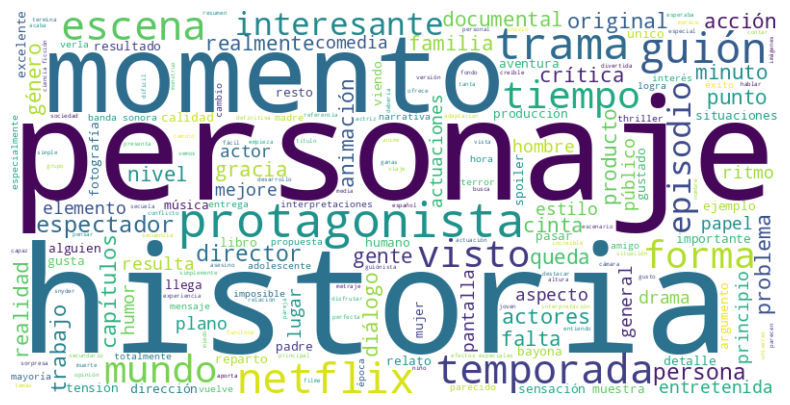

In [302]:
#Wordcloud con las palabras de mayor frecuencia, considerando todas las reseñas
text = ' '.join(reviews["Reseñas"].apply(lambda x: ' '.join(x)))

# Generar la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()


A primera vista, en el conjunto de reseñas parecieran ser muy importantes diferentes claves como los personajes, la historia, los momentos, las tramas, las escenas y las temporadas, lo cual no supone ninguna sorpresa.

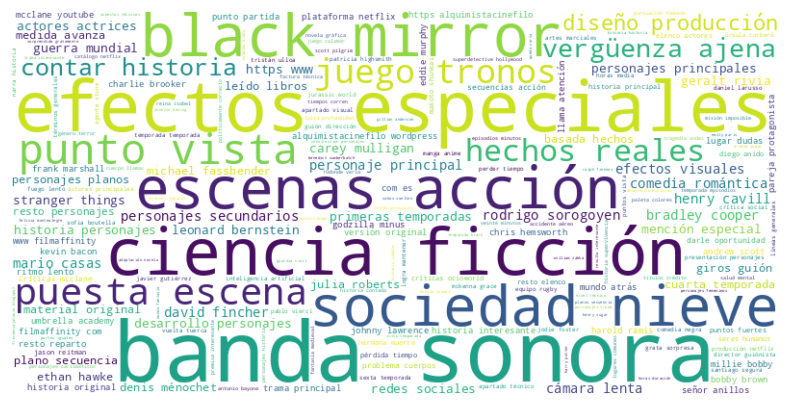

In [303]:
#Creación de un WordCloud con Bigramas

# Crear el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(2,2))

# Convertir la columna 'Reseñas' de lista de tokens a string uniéndolos con un espacio
reviews["Reseñas_string"] = reviews["Reseñas"].apply(lambda x: ' '.join(x))

# Transformar el texto de la columna 'Reseñas_string' en n-gramas
X_bigrama_1 = vectorizer.fit_transform(reviews["Reseñas_string"])

# Extraer los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies_1 = X_bigrama_1.toarray().sum(axis=0)

# Crear un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies_1))


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Observando ahora los Bigramas del conjunto de reseñas, se puede observar que salen en varias ocasiones las siguientes palabras:
Banda Sonora
Black Mirror
Ciencia Ficción
Escenas Acción
Efectos Especiales
Sociedad nieve
Puesta en escena

No sorprende que Black Mirror o Sociedad Nieve aparezcan en este listado. Black Mirror fue la serie con mayor promedio de puntuación, así como la Sociedad de la Nieve fue la película con mayor cantidad de reseñas

Pareciera ser relevante para el conjunto de las reseñas tanto la banda sonora, los efectos especiales, las escenas de acción y la puesta en escena, elementos que deben ser clave a la hora de elegirse una calificación.

# **Wordcloud para reseñas positivas**

In [304]:
#función para definir una calificación binaria en función de las diferentes puntuaciones
def cal(x):
    if x > 6:
        return "Aprobado"
    elif x < 7:
        return "Reprobado"


In [305]:
#aplicación de la función para crear una columna nueva en el DataFrame original
reviews["Calificación"] = reviews["review_rate"].apply(cal)

In [306]:
#división en dos Dataframes, las reseñas aprobadas y las reseñas desaprobadas
reviews_pos = reviews[reviews["Calificación"]== "Aprobado"]
reviews_neg = reviews[reviews["Calificación"]== "Reprobado"]

In [307]:
#creación de una variable para unir las diferentes reseñas, para facilitar la creación de la WordCloud
text2 = ' '.join(reviews_pos["Reseñas"].apply(lambda x: ' '.join(x)))

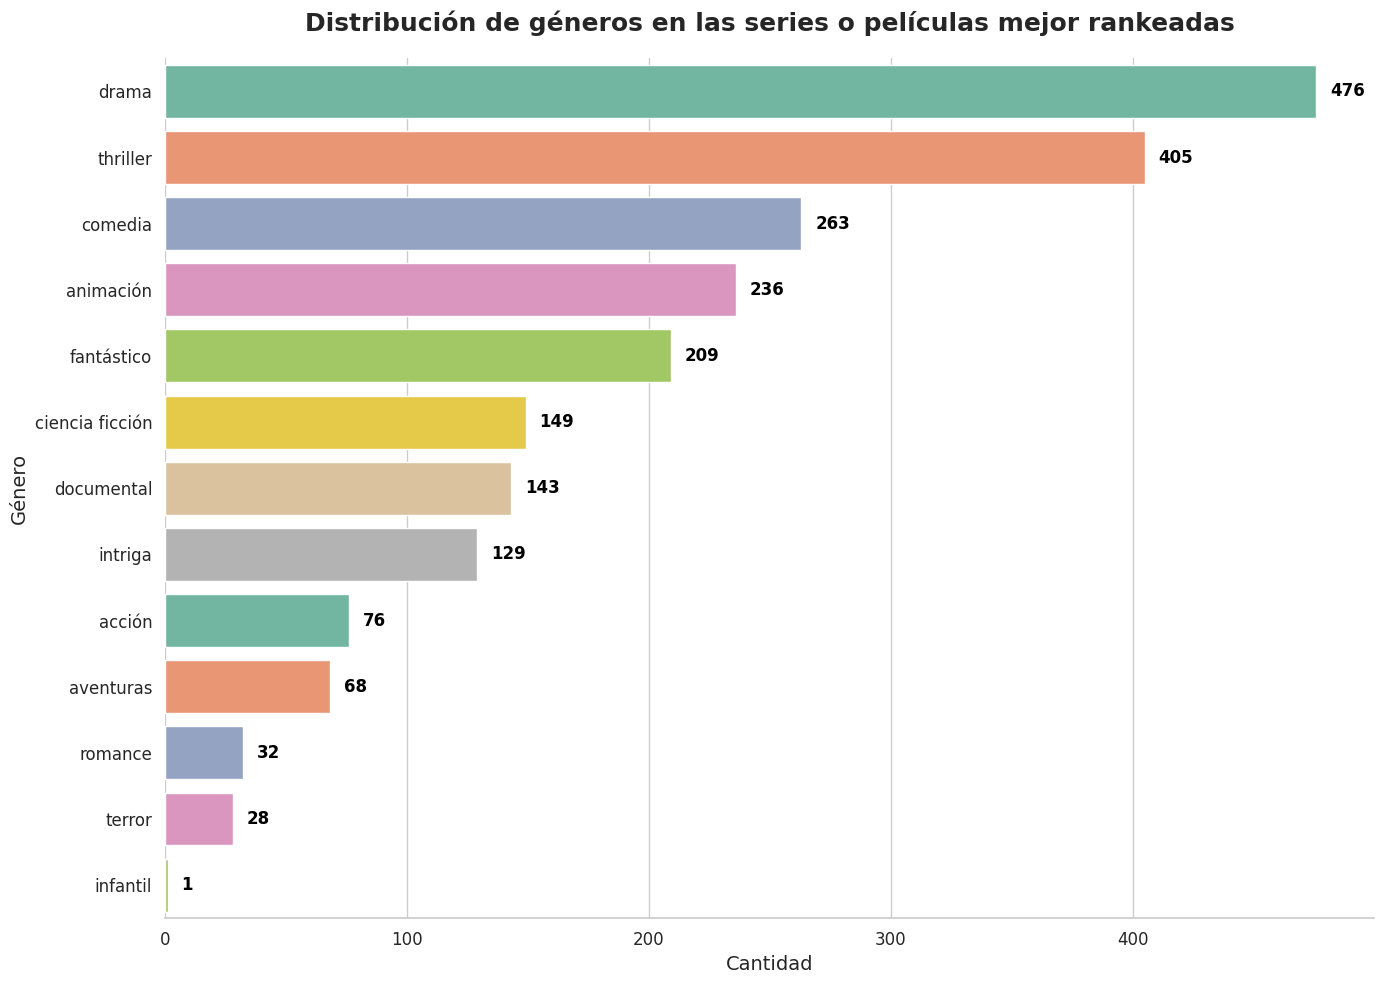

In [308]:
#Creación de una variable para contar la cantidad de péliculas por género así como para extraer su index
count_gen_pos = reviews_pos["Género 1"].value_counts()
gen_pos = count_gen_pos.index  # Usar el índice ordenado de value_counts()

plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

ax = sns.barplot(
    x=count_gen_pos.values,  # Valores en eje X (cantidad)
    y=gen_pos,          # Géneros en eje Y
    palette=colors2
)


for container in ax.containers:
    ax.bar_label(container,
                fmt='%d',
                padding=10,
                color='black',
                fontsize=12,
                fontweight='bold')


plt.title("Distribución de géneros en las series o películas mejor rankeadas",
         fontsize=18,
         fontweight='bold',
         pad=20)
plt.xlabel("Cantidad", fontsize=14)
plt.ylabel("Género", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
sns.despine(left=True)  # Eliminar bordes innecesarios
plt.show()

Observando la cantidad de reseñas, se puede decir que casi la mitad de las series o películas del género "Drama" obtuvieron reseñas con un puntaje mayor a 7. Números similares obtuvo la categoría de Thriller, de Comedia y del género fantastico.

Cabe resaltar que el género de Animación obtuvo más de la mitad de las reseñas con un puntaje mayor a 7 puntos, así como también sucedió lo mismo con el género documental.

In [309]:
reviews_pos.describe().round(0)

film_avg_rate  review_rate
count         2215.0       2215.0
mean             7.0          8.0
std              1.0          1.0
min              3.0          7.0
25%              6.0          7.0
50%              7.0          8.0
75%              8.0          9.0
max              8.0         10.0

En los estadisticos de este Describe podemos observar que el promedio de puntuaciones de las reseñas positivas se encuentra en 8 puntos.

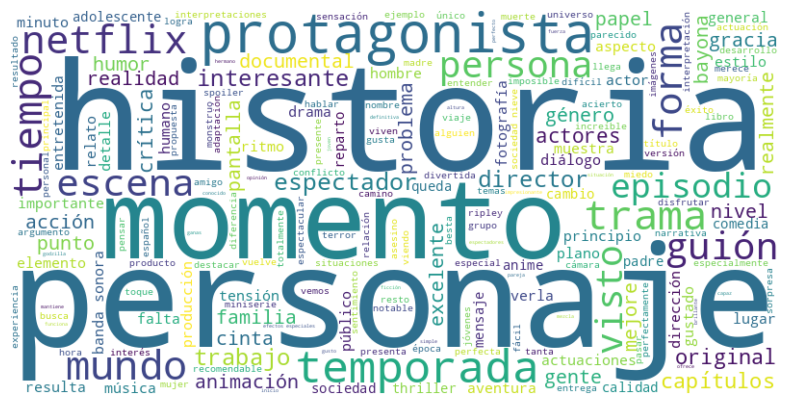

In [310]:
# Generar la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Similarmente a lo que sucedió en el primer WordCloud, en las reseñas positivas tienden a ser importantes los personajes, los protagonistas, la historia, los momentos, las escenas y los actores.

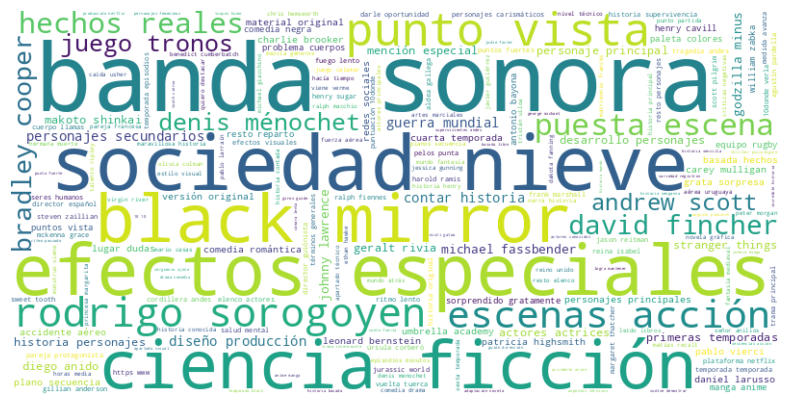

In [311]:
# Crear el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(2,2))

# Transformar el texto de la columna 'Reseñas_string' en n-gramas
X_big_2 = vectorizer.fit_transform(reviews_pos["Reseñas_string"])

n_grams = vectorizer.get_feature_names_out()
frequencies = X_big_2.toarray().sum(axis=0)

n_grams_freq = dict(zip(n_grams, frequencies))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Como sucedió en el WordCloud con Bigramas del DataFrame original, se resaltan series como la Sociedad de la nieve y Black Mirror, así como elementos que tienen que ver con la banda sonora, las escenas de acción, los efectos especiales, la puesta en escena.

Cabe resaltar la continuidad de la idea de Ciencia Ficción como un punto clave en las reseñas positivas.

A lo ya indicado en el primer WordCloud de Bigramas, podemos observar la aparición de directores como Rodrigo Sorogoyen y David Fincher. Lo mismo sucede con actores como Andrew Scott, Denis Menochet, Bradley Cooper, Michael Fassbender, así como el personaje Johny Lawrence.

In [312]:
#variable para contar las  15 palabras que más salen en las reseñas positivas
textos_pos = pd.Series(text2)
count_pos = Counter(' '.join(textos_pos).split()).most_common(15)

In [313]:
count_pos

[('historia', 1991),
 ('personajes', 1430),
 ('temporada', 764),
 ('personaje', 621),
 ('mundo', 603),
 ('netflix', 597),
 ('momentos', 565),
 ('trama', 539),
 ('guión', 532),
 ('momento', 523),
 ('forma', 514),
 ('protagonista', 504),
 ('tiempo', 481),
 ('espectador', 470),
 ('director', 465)]

En este conteo de palabras, quizás sorprenda la palabra "Mundo" y "Protagonista", que tenían menos espacio hasta ahora.

# **Wordcloud para reseñas negativas**

In [314]:
#variable para la Wordcloud de reseñas negativas
text3= ' '.join(reviews_neg["Reseñas"].apply(lambda x: ' '.join(x)))

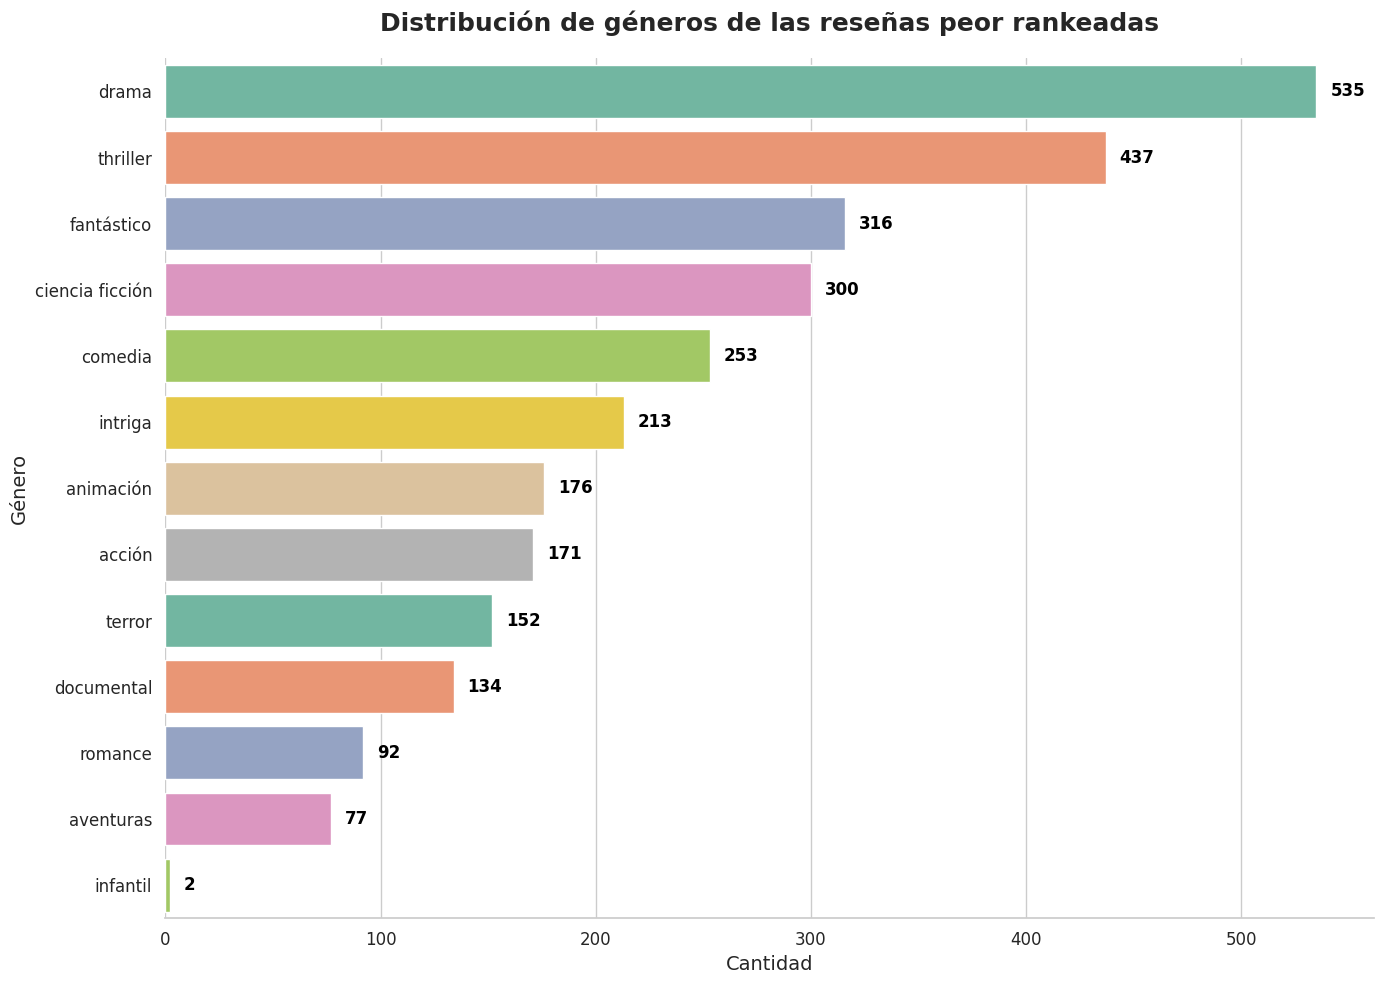

In [315]:
#variables para contar la cantidad de reseñas negativas según su género
count_gen_neg = reviews_neg["Género 1"].value_counts()
gen_neg = count_gen_neg.index


plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")


ax = sns.barplot(
    x=count_gen_neg.values,  # Valores en eje X (cantidad)
    y=gen_neg,          # Géneros en eje Y
    palette=colors2
)


for container in ax.containers:
    ax.bar_label(container,
                fmt='%d',
                padding=10,
                color='black',
                fontsize=12,
                fontweight='bold')


plt.title("Distribución de géneros de las reseñas peor rankeadas",
         fontsize=18,
         fontweight='bold',
         pad=20)
plt.xlabel("Cantidad", fontsize=14)
plt.ylabel("Género", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
sns.despine(left=True)
plt.show()

En este ranking de reseñas con puntajes bajos, podemos observar la predominancia cuantitativa del Drama, del Thriller y del género fantástico. Pero teniendo en cuenta los números en general, prácticamente las reseñas están repartidas en mitades.

En cambio géneros como la Ciencia Ficción (con 300 reseñas negativas sobre un total de 449), así como la categoría intriga (con 213 sobre un total de 342 reseñas) y el género Terror (con 152 reseñas negativas sobre un total de 180 películas) parecieran ser las categorías peor rankeadas.


In [316]:
reviews_neg.describe().round(0)

film_avg_rate  review_rate
count         2858.0       2858.0
mean             6.0          4.0
std              1.0          2.0
min              3.0          1.0
25%              5.0          3.0
50%              6.0          5.0
75%              6.0          6.0
max              8.0          6.0

En el describe anterior, se puede observar que el puntaje promedio de las reseñas negativas es de 4 puntos.

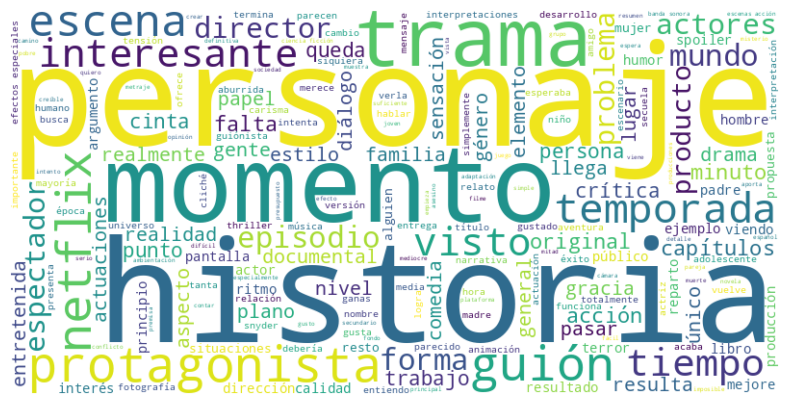

In [317]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text3)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


En las reseñas negativas, siguen predominando palabras como Historia, Personaje, Protagonista, Trama, Momento, Temporada, Episodio. Es llamativo el peso que tiene Netflix también en estas reseñas.

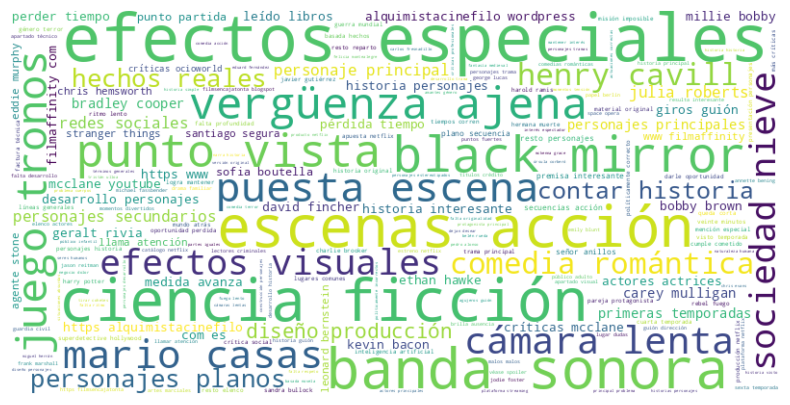

In [318]:
# Crear el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(2,2))

# Transformar el texto de la columna 'Reseñas_string' en n-gramas
X_big_3 = vectorizer.fit_transform(reviews_neg["Reseñas_string"])

# Extraer los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X_big_3.toarray().sum(axis=0)

# Crear un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

En este wordcloud de Bigramas para reseñas negativas, ya se puede apreciar la aparición de formulaciones más subjetivas como "Verguenza ajena", así como críticas más específicas como la cámara lenta.

Además, persisten frases como efectos especiales, efectos visuales, banda sonora, y aparece la comedia romántica como uno de los objetivos de la crítica.

Resulta curioso además que figure en estas reseñas la serie Black Mirror, que fue la serie con mayor puntaje promedio en las diferentes reseñas.

Finalmente, aparecen otros actores como Julia Robert, Mario Casas, Millie Bobby Brown, Kevin Bacon y Henry Cavill.

In [319]:
#contador de 15 palabras más comunes en reseñas negativas
textos_neg = pd.Series(text3)
count_neg = Counter(' '.join(textos_neg).split()).most_common(15)

In [320]:
count_neg

[('historia', 1843),
 ('personajes', 1583),
 ('netflix', 996),
 ('guión', 966),
 ('trama', 864),
 ('personaje', 735),
 ('visto', 636),
 ('temporada', 628),
 ('escenas', 625),
 ('protagonista', 620),
 ('momentos', 591),
 ('tiempo', 580),
 ('actores', 569),
 ('acción', 549),
 ('mundo', 534)]

Si bien en este contador no hay grandes novedades, sorprende el peso que tiene la palabra "Netflix". Quizás la plataforma de series recibe críticas por tener series o películas consideradas malas, cosa que no dejan pasar las diferentes reseñas.

# **Wordcloud para las 100 series/peliculas mejor rankeadas**

In [321]:
#variable para contar las 100 series y películas mejor rankeadas
rev_pos_top = (
    reviews_pos
    .sort_values(by="review_rate", ascending=False)
    .drop_duplicates(subset=["film_name"])  # Elimina duplicados basados en el nombre

)

rev_pos_top = rev_pos_top.head(100)

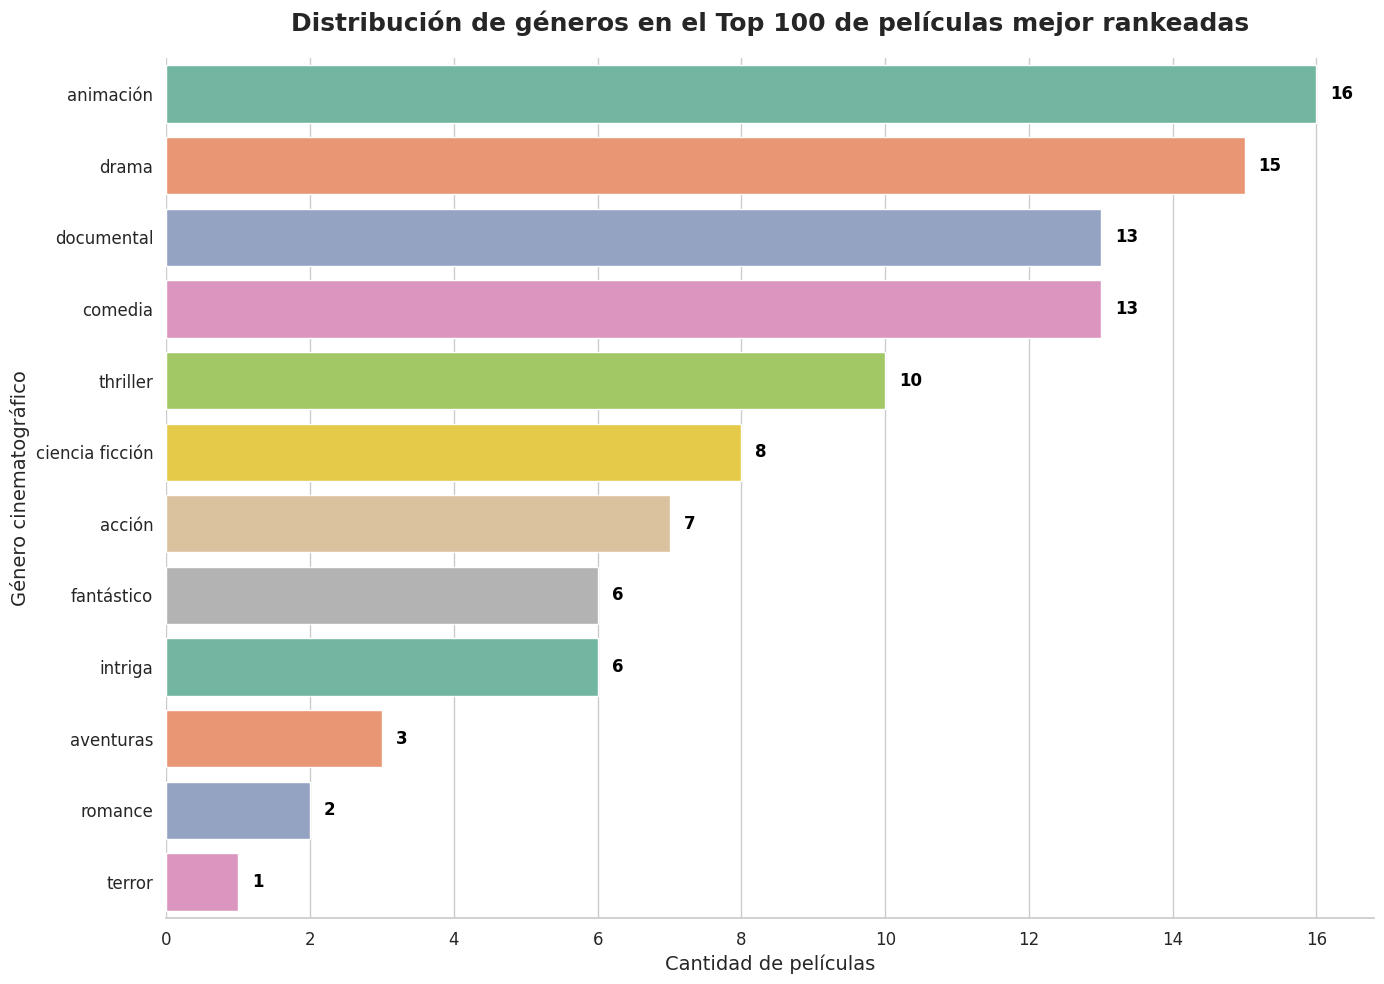

In [322]:
# Preparación de datos
count_top = rev_pos_top["Género 1"].value_counts()
gen_top = count_top.index  # Usar el índice ordenado de value_counts()

# Configuración de estilo
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Gráfico de barras
ax = sns.barplot(
    x=count_top.values,  # Valores en eje X (cantidad)
    y=gen_top,          # Géneros en eje Y
    palette=colors2
)

# Añadir etiquetas a las barras
for container in ax.containers:
    ax.bar_label(container,
                fmt='%d',
                padding=10,
                color='black',
                fontsize=12,
                fontweight='bold')

# Personalización
plt.title("Distribución de géneros en el Top 100 de películas mejor rankeadas",
         fontsize=18,
         fontweight='bold',
         pad=20)
plt.xlabel("Cantidad de películas", fontsize=14)
plt.ylabel("Género cinematográfico", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mejorar espaciado y mostrar
plt.tight_layout()
sns.despine(left=True)  # Eliminar bordes innecesarios
plt.show()

En este gráfico, podemos apreciar el peso que tiene el género de animación que teniendo solamente 412 reseñas, logra ser la categoría con la mayor cantidad de reseñas en el top 100.

Además, cabe resaltar que la categoría comedia logra tener una mayor cantidad de reseñas en el top 100 que el género fantástico y el género Thriller.

In [323]:
rev_pos_top.describe()

film_avg_rate  review_rate
count     100.000000        100.0
mean        6.091000         10.0
std         1.081628          0.0
min         3.300000         10.0
25%         5.400000         10.0
50%         6.300000         10.0
75%         6.800000         10.0
max         8.200000         10.0

En el describe anterior podemos observar que todas las reseñas del top 100 tienen 10 puntos de calificación.

In [324]:
text4 = ' '.join(rev_pos_top["Reseñas"].apply(lambda x: ' '.join(x)))

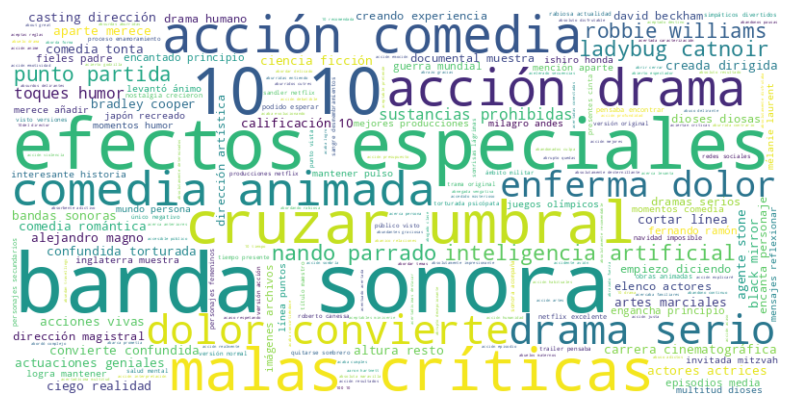

In [325]:
# Crear el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(2,2))

# Transformar el texto de la columna 'Reseñas_string' en n-gramas
X_big_4 = vectorizer.fit_transform(rev_pos_top["Reseñas_string"])

# Extraer los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X_big_4.toarray().sum(axis=0)

# Crear un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

En este wordcloud de bigramas de las series mejor rankeadas, podemos observar la relevancia que tienen los efectos especiales, la banda sonora, la acción y la comedia, así como el drama.

Resalta también el peso de la inteligencia artificial.

En gran medida, estos elementos parecieran indicar cierta relevancia de la ciencia ficción y la comedia por encima de otros géneros.

In [326]:
#palabras que más salen en el top 100 de reseñas positivas
txt_pos_100 = pd.Series(text4)
count_pos_100 = Counter(' '.join(txt_pos_100).split()).most_common(15)

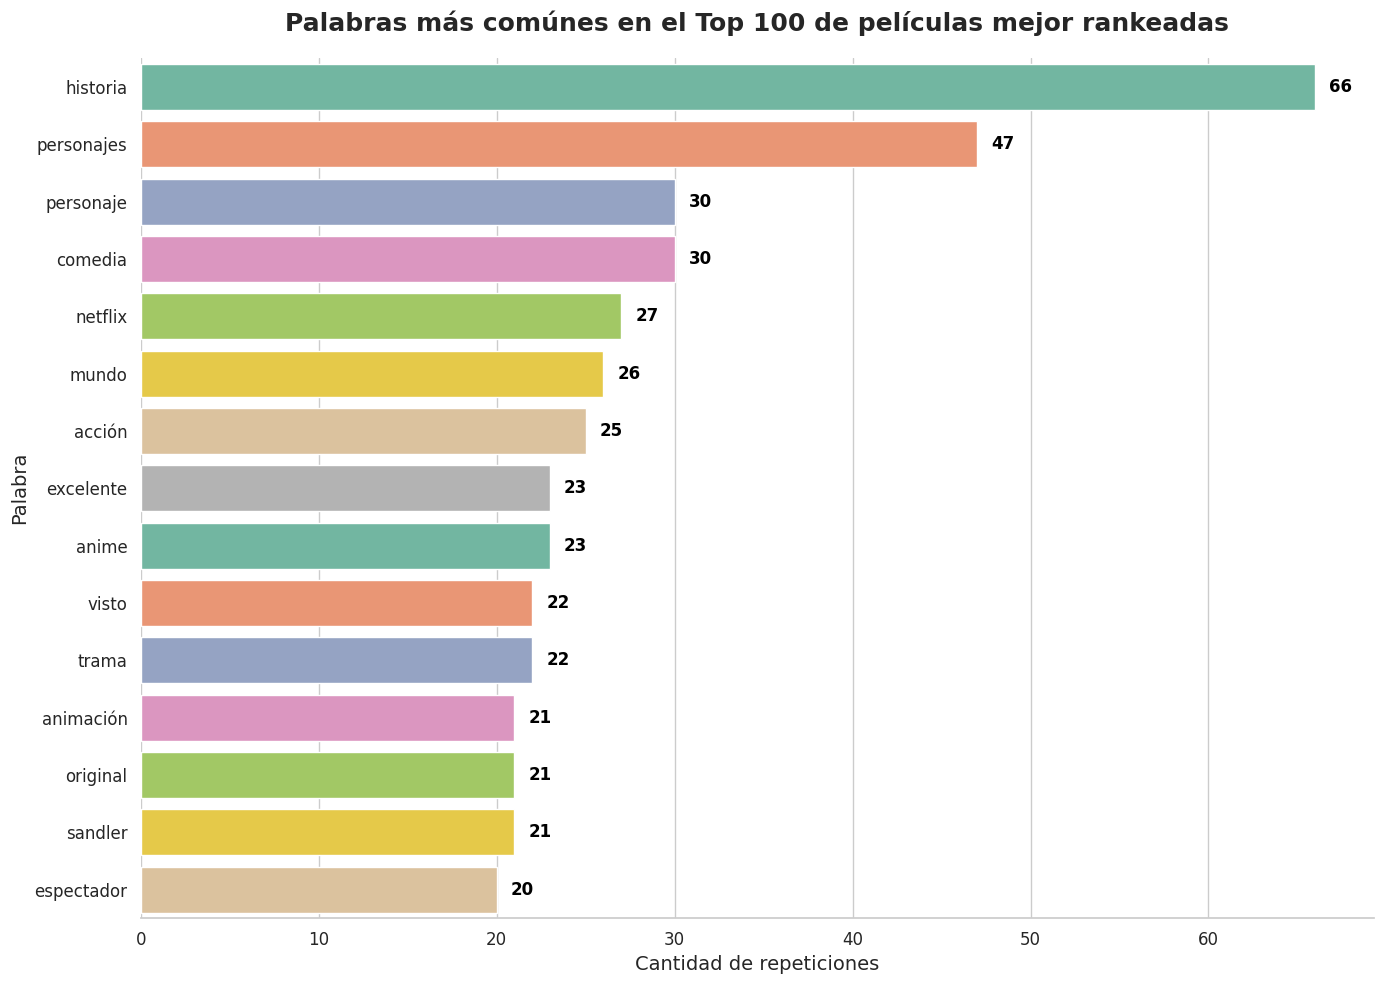

In [327]:
# Extraer palabras y frecuencias
pal_top_100 = [item[0] for item in count_pos_100]
frec_top_100 = [item[1] for item in count_pos_100]

plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")


ax = sns.barplot(
    x=frec_top_100,  # Valores en eje X (cantidad)
    y=pal_top_100,          # Géneros en eje Y
    palette=colors2
)


for container in ax.containers:
    ax.bar_label(container,
                fmt='%d',
                padding=10,
                color='black',
                fontsize=12,
                fontweight='bold')


plt.title("Palabras más comúnes en el Top 100 de películas mejor rankeadas",
         fontsize=18,
         fontweight='bold',
         pad=20)
plt.xlabel("Cantidad de repeticiones", fontsize=14)
plt.ylabel("Palabra", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mejorar espaciado y mostrar
plt.tight_layout()
sns.despine(left=True)  # Eliminar bordes innecesarios
plt.show()

En el conjunto de reseñas del top 100, parecieran ser muy relevantes la historia, los personajes, la comedia y el anime.

Figura también la palabra "mundo", lo cual cabria explorar con mayor profundidad.

Además, resalta la palabra Sandler, probablemente por el apellido del actor Adam Sandler.

# **Wordcloud para las 100 series/películas peor rankeadas**


In [328]:
#variable con el top 100 de peliculas peor rankeadas
rev_neg_top = (
    reviews_neg
    .sort_values(by="review_rate", ascending=True)
    .drop_duplicates(subset=["film_name"])  # Elimina duplicados basados en el nombre
)

rev_neg_top = rev_neg_top.head(100)

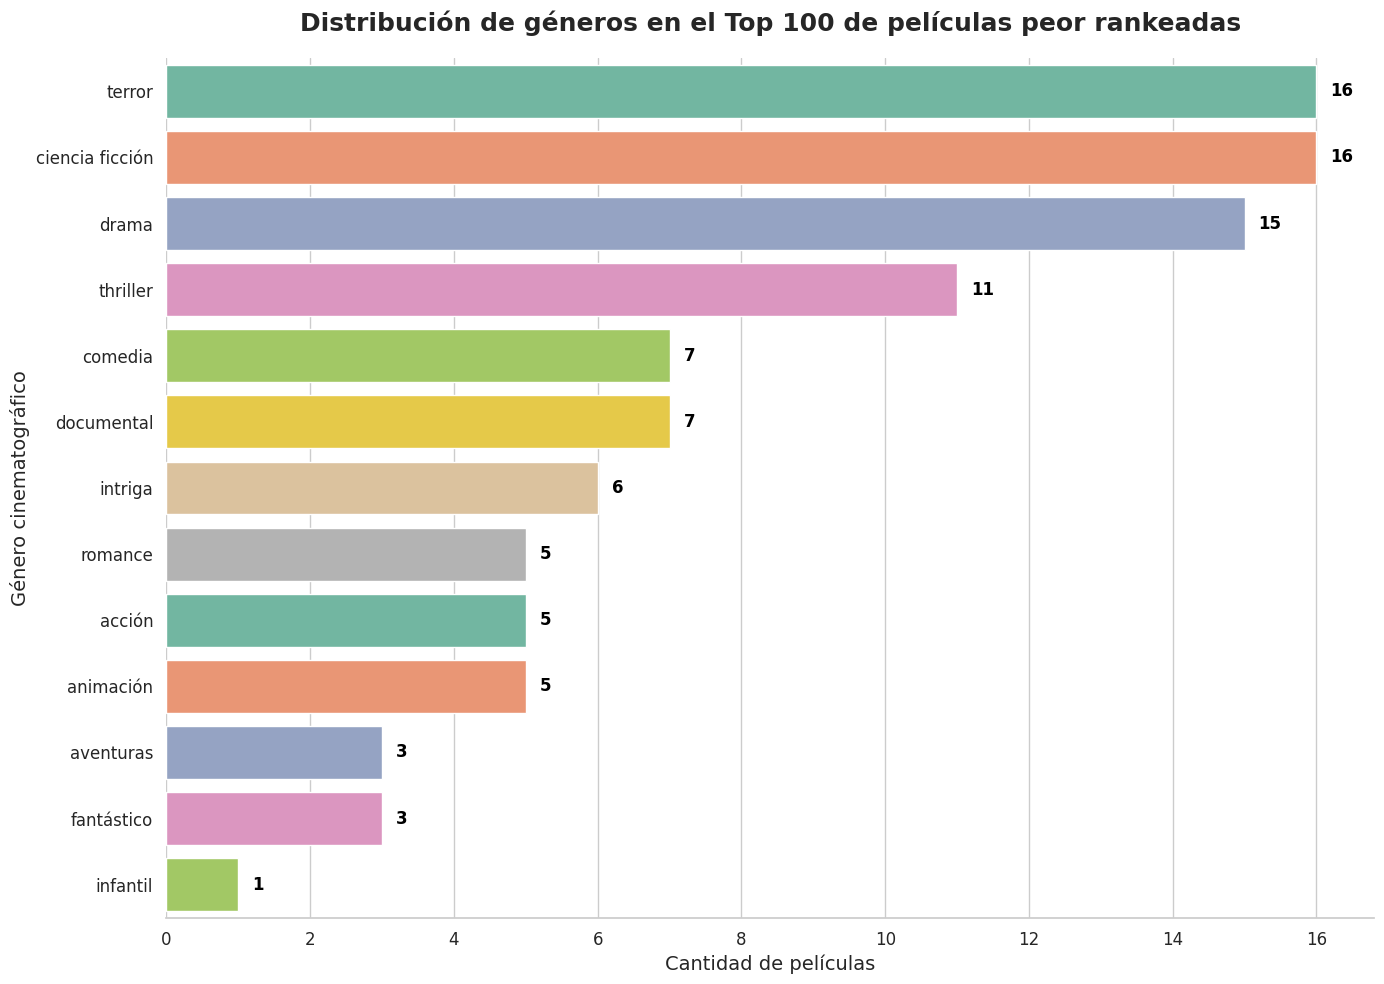

In [329]:
#Variables para hacer el contador de casos por género con su respectivo indice
count_top_neg = rev_neg_top["Género 1"].value_counts()
gen_top_neg = rev_neg_top["Género 1"].unique() # Usar el índice ordenado de value_counts()


plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")


ax = sns.barplot(
    x=count_top_neg.values,  # Valores en eje X (cantidad)
    y=gen_top_neg,          # Géneros en eje Y
    palette=colors2
)


for container in ax.containers:
    ax.bar_label(container,
                fmt='%d',
                padding=10,
                color='black',
                fontsize=12,
                fontweight='bold')


plt.title("Distribución de géneros en el Top 100 de películas peor rankeadas",
         fontsize=18,
         fontweight='bold',
         pad=20)
plt.xlabel("Cantidad de películas", fontsize=14)
plt.ylabel("Género cinematográfico", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mejorar espaciado y mostrar
plt.tight_layout()
sns.despine(left=True)  # Eliminar bordes innecesarios
plt.show()

Resalta en este top 100 la aparición en tantas ocasiones de la categoría Terror así como de la ciencia ficción, lo que podría indicar la dificultad de realizar series o películas de estos géneros que contenten a los críticos.

Además, cabe señalar que hay pocos casos de series o películas de animación y del género fantastico en el top 100 de peores reseñas.

In [330]:
rev_neg_top.describe()

film_avg_rate  review_rate
count     100.000000        100.0
mean        5.495000          1.0
std         1.211675          0.0
min         3.300000          1.0
25%         4.475000          1.0
50%         5.600000          1.0
75%         6.300000          1.0
max         8.200000          1.0

En el describe anterior se puede observar que en todos las reseñas la calificación fue de tan solamente un punto.

In [331]:
#variable para crear la Wordcloud
text5= ' '.join(rev_neg_top["Reseñas"].apply(lambda x: ' '.join(x)))

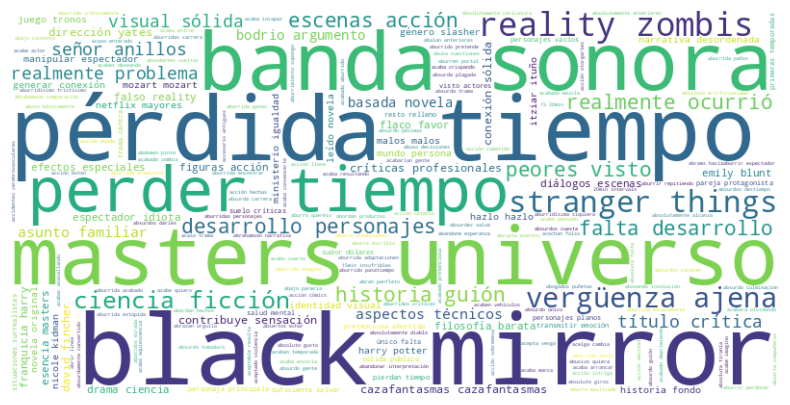

In [332]:
vectorizer = CountVectorizer(ngram_range=(2,2))

# Transformar el texto de la columna 'Reseñas_string' en n-gramas
X_big_5 = vectorizer.fit_transform(rev_neg_top["Reseñas_string"])

# Extraer los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X_big_5.toarray().sum(axis=0)

# Crear un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))

# Generar la WordCloud desde las frecuencias de los n-gramas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_grams_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

En este Word Cloud, quizás lo más relevante sea la aparición de la idea de perdida de tiempo, como señal inequivoca de repudio en las reseñas.

In [333]:
txt_neg_100 = pd.Series(text5)
count_neg_100 = Counter(' '.join(txt_neg_100).split()).most_common(15)

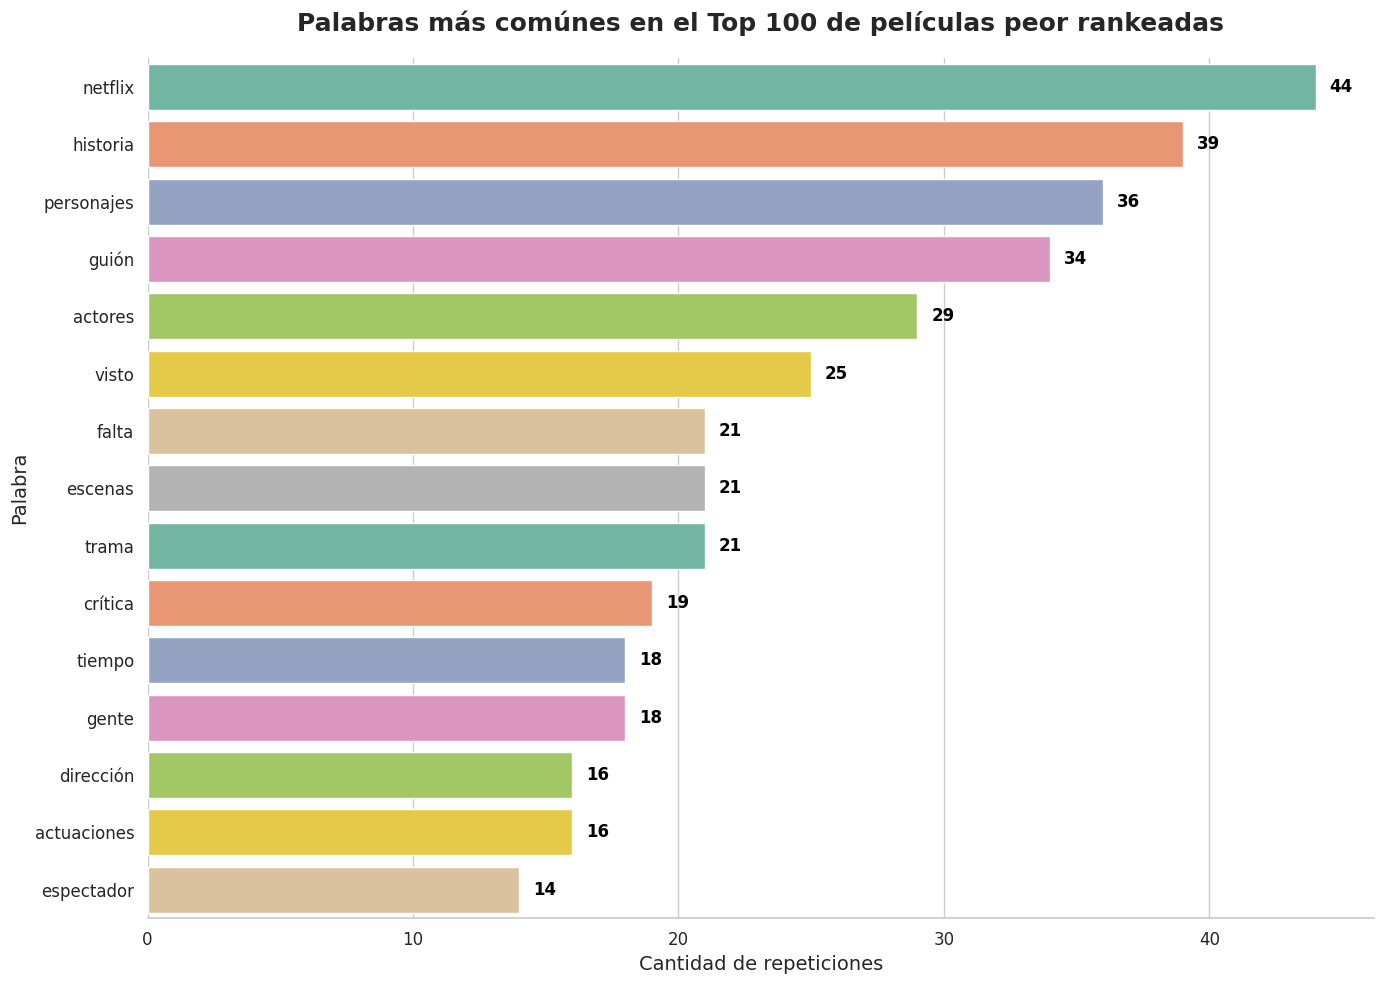

In [334]:
# Extraer palabras y frecuencias
pal_neg_top_100 = [item[0] for item in count_neg_100]
frec_neg_top_100 = [item[1] for item in count_neg_100]

plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")


ax = sns.barplot(
    x=frec_neg_top_100,  # Valores en eje X (cantidad)
    y=pal_neg_top_100,          # Géneros en eje Y
    palette=colors2
)


for container in ax.containers:
    ax.bar_label(container,
                fmt='%d',
                padding=10,
                color='black',
                fontsize=12,
                fontweight='bold')


plt.title("Palabras más comúnes en el Top 100 de películas peor rankeadas",
         fontsize=18,
         fontweight='bold',
         pad=20)
plt.xlabel("Cantidad de repeticiones", fontsize=14)
plt.ylabel("Palabra", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mejorar espaciado y mostrar
plt.tight_layout()
sns.despine(left=True)  # Eliminar bordes innecesarios
plt.show()

La aparición de netflix como la palabra más mencionada pareciera ser claramente un indicio de una crítica a la plataforma de series y películas en las reseñas

# **Modelo de regresión logística - BoW**

In [335]:
#función para crear una columna binaria de aprobación y desaprobación de las reseñas
#siendo 0=reprobado, 1=aprobado
def clas(x):
    if x == "Aprobado":
        return 1
    else:
        return 0

In [336]:
#preparación del DataFrame para crear un modelo de regresión logística
reviews_3 = reviews.drop(["film_name", "film_avg_rate", "review_rate", "review_title", "review_text", "Género 1", "Reseñas_string"], axis=1)
reviews_3["Calificación"] = reviews_3["Calificación"].apply(clas)
reviews_3.head()

Reseñas  \
0                                                                                                                                                                                                                                                                                                                                                                       [españolas, najwa, duele, enseñar, cacho, najwa, papel, repetido, aporta, telenovela, mediodía, guión, mediocre, diálogos, planos, aspectos, técnicos, fotografía, sonido, desear, carlos, montero]   
1                                                                                                                                                                                                             [posee, respira, diálogos, penosos, personajes, puras, caricaturas, tramas, venir, actores, caras, vocalizar, cuotas, tocan, aitana, metida, viendo, temporada, dorada, comparar, ligera, viene, salvar, mundo, ápice, similitud, cuidado, basura, cuyos, implicados, excepción, positivamente, suelo, estómago, ofendido, viendo, respira, insultado, tonto]   
2                                                                                                                                     [drama, médico, intenta, copiar, estilemas, yankies, adaptándolos, español, historia, transcurre, hospital, valenciano, representado, inverosímil, ambiente, hospital, representado, dista, realidad, hospitalaria, valenciana, española, guión, entremezcla, dramas, médicos, plateados, dramas, cotidianos, pueriles, riículos, diálogos, personajes, estereotipo, típica, netflix, distribuidora, suele, llenar, grilla, bazofias]   
3  [obliga, quieras, dinero, público, involucrado, puedes, quejarte, producción, audiovisual, única, salida, verla, recomendarla, enemigo, producción, española, visionado, obliga, crítica, negativa, respira, opción, resulta, ofensiva, tantas, producirse, estrenarse, plataformas, canales, televisión, falta, talento, concreto, equipo, técnico, artístico, resultan, mediocres, culpa, guiónes, planos, dirección, interpretaciones, historias, carecen, credibilidad, diálogos, vergüenza, ajena, sector, mejores, historias, contar, dándome, plataforma, merece]   
4                                                                                                                                                                                                                                                                                           [vergüenza, ajena, únicas, personas, trabajan, hospital, médicos, rastro, enfermeras, celadores, personal, limpieza, favor, quieren, hospital, informen, poquito, funcionamiento, escenas, ridículas, diálogos, gracioso, liados, discoteca, hospital, quieres, perder, tiempo]   

   Calificación  
0             0  
1             0  
2             0  
3             0  
4             0

In [337]:
#creación de las variables para el modelo de regresión
X= reviews_3['Reseñas']
X= X.apply(lambda x: ' '.join(x))
y= reviews_3['Calificación']

In [338]:
#importación y validación simple de los datos del modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [339]:
#importación de librerías para el modelo de Regresión, el Bag of Words (BoW) y la vectorización
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [340]:
# Inicializar el CountVectorizer (BoW)
vectorizador_bow = CountVectorizer()

# Ajustar y transformar las reseñas de entrenamiento
X_train_bow = vectorizador_bow.fit_transform(X_train)

X_train_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 274842 stored elements and shape (3551, 39916)>

In [341]:
# Transformar las reseñas de testeo
X_test_bow = vectorizador_bow.transform(X_test)
X_test_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 108482 stored elements and shape (1522, 39916)>

In [342]:
#creación de variable de validación cruzada
S_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#creación de modelo de regresión logística
reg_log_bow = LogisticRegression(
    C=0.009,                #
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    n_jobs=-1
)

#validación cruzada
cv_scores = cross_val_score(
    estimator=reg_log_bow,
    X=X_train_bow,
    y=y_train,
    cv=S_kfold,
    scoring='accuracy',
    n_jobs=-1
)

#entrenamiento del modelo
reg_log_bow.fit(X_train_bow, y_train)

LogisticRegression(C=0.009, max_iter=1000, n_jobs=-1, solver='liblinear')

El modelo creado en la celda anterior tiene una importante penalización al overfitting, ya que en diferentes pruebas con grillas el modelo tendió a adaptarse demasiado a los datos de entrenamiento, por lo que se procedió a crear un modelo que directamente defina una fuerte penalización para evitar el sobre-ajuste

In [343]:
#predicciones del modelo de regresión logistica
y_pred_train_bow = reg_log_bow.predict(X_train_bow)
y_pred_test_bow= reg_log_bow.predict(X_test_bow)

In [344]:
print("Reporte de clasificación con datos de entrenamiento:")
print(classification_report(y_train, y_pred_train_bow))

Reporte de clasificación con datos de entrenamiento:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1995
           1       0.94      0.76      0.84      1556

    accuracy                           0.87      3551
   macro avg       0.89      0.86      0.87      3551
weighted avg       0.88      0.87      0.87      3551



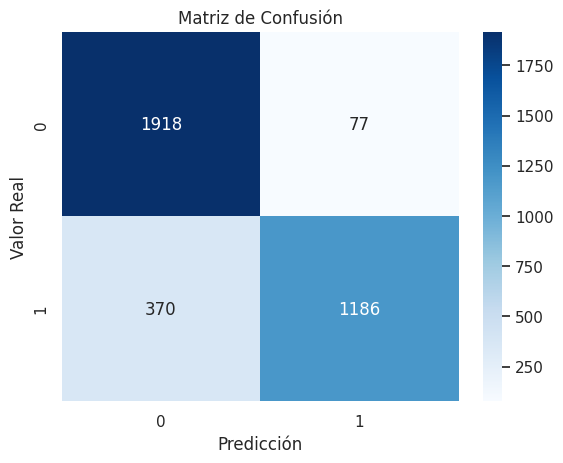

In [345]:
#matriz de confusión del modelo de regresión con datos de entrenamiento
cm = confusion_matrix(y_train, y_pred_train_bow)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

In [346]:
print("Reporte de clasificación con datos de testeo:")
print(classification_report(y_test, y_pred_test_bow))

Reporte de clasificación con datos de testeo:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       863
           1       0.79      0.55      0.65       659

    accuracy                           0.74      1522
   macro avg       0.76      0.72      0.72      1522
weighted avg       0.75      0.74      0.73      1522



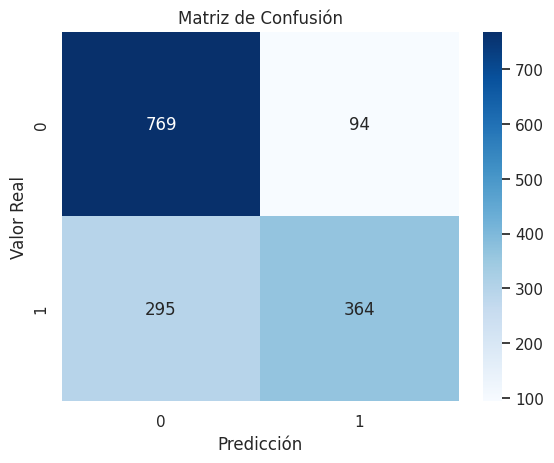

In [347]:
#matriz de confusión con datos de testeo
cm = confusion_matrix(y_test, y_pred_test_bow)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Observando globalmente las métricas del reporte, se puede ver cierto overfitting con los datos de entrenamiento, ya que el accuracy es de 0.87 con datos de train, mientras que tan solamente alcanza un 0.74 con los datos de testeo

Adicionalmente, comparando las diferentes metricas de las variables binarias, el modelo pareciera detectar de mejor manera las películas y series desaprobadas, ya que el Recall en esa clase de datos se encuentra entre 0.89 y 0.96.

Contrariamente, el recall para detectar las películas y series calificadas con un puntaje de 7 o mayor es bastante más bajo, alcanzando 0.75 en los datos de entrenamiento y 0.55 en los datos de testeo.

In [348]:
# Obtenemos las palabras del vocabulario
palabras_bow = vectorizador_bow.get_feature_names_out()

# Coeficientes del modelo (uno por palabra)
coeficientes_bow = reg_log_bow.coef_[0]

# Creamos un DataFrame para visualizarlo
df_coef_bow = pd.DataFrame({'palabra': palabras_bow, 'coeficiente': coeficientes_bow})

df_coef_bow = df_coef_bow.sort_values(by='coeficiente', ascending=False)

print("🔼 Palabras más asociadas a reseñas positivas:")
print(df_coef_bow.head(10))

print("\n🔽 Palabras más asociadas a reseñas negativas:")
print(df_coef_bow.tail(10))

🔼 Palabras más asociadas a reseñas positivas:
            palabra  coeficiente
31624  recomendable     0.207002
16139     excelente     0.179189
4664         bayona     0.178754
35477     sorogoyen     0.170348
28501      perfecta     0.168513
17472         forma     0.162762
33280        ripley     0.156678
22487        karate     0.145801
12102       detalle     0.145485
26558       notable     0.138907

🔽 Palabras más asociadas a reseñas negativas:
         palabra  coeficiente
34966   siquiera    -0.142180
16754      falta    -0.142829
15158    escenas    -0.144877
26317    netflix    -0.154020
25200    minutos    -0.162191
372     aburrida    -0.163002
18799      guión    -0.172225
30955      queda    -0.175113
30263   producto    -0.187227
34354  sensación    -0.196609


Como se denota por las palabras asociadas a las reseñas positivas, pareciera haber varias palabras que no necesariamente denotan una aprobación en la reseña (como "Karate", "sorogoyen" o "ripley") pero que son calificadas como positivass

Algo similar sucede con palabras como "siquiera", "minutos" o "sensación" o "producto" en las reseñas negativas.

In [349]:
#Prueba con reseña positiva

reseña_1 = "Es una gran serie, con buenos personajes, una historia divertida"
nueva_reseña_bow = vectorizador_bow.transform([reseña_1])
prediccion = reg_log_bow.predict(nueva_reseña_bow)

# Obtener la probabilidad de la predicción
prob_positiva = reg_log_bow.predict_proba(nueva_reseña_bow)

# Obtener la probabilidad en la clase predicha (0 o 1)
probabilidad = prob_positiva[0][1]  # Probabilidad de la clase "positivo"

print(f"Se predice que la crítica es de caracter {prediccion[0]}")
print(f" con una probabilidad de que sea positiva de {probabilidad:.2f}")

Se predice que la crítica es de caracter 0
 con una probabilidad de que sea positiva de 0.50


In [350]:
#Prueba con reseña negativa

reseña_2 = "Es una película pesima, personajes aburridos y previsibles"
nueva_reseña_bow_2 = vectorizador_bow.transform([reseña_2])
prediccion_2 = reg_log_bow.predict(nueva_reseña_bow_2)

# Obtener la probabilidad de la predicción
prob_negativa = reg_log_bow.predict_proba(nueva_reseña_bow_2)

# Obtener la probabilidad en la clase predicha (0 o 1)
probabilidad = prob_negativa[0][1]  # Probabilidad de la clase "positivo"

print(f"Se predice que la crítica es de caracter {prediccion_2[0]}")
print(f" con una probabilidad de que sea positiva de {probabilidad:.2f}")

Se predice que la crítica es de caracter 0
 con una probabilidad de que sea positiva de 0.44


Observando estos dos casos, el predictor creado no puede predecir correctamente una valoración positiva. Adicionalmente, aunque puede detectar que el segundo caso es una reseña negativa, se encuentra en valores muy cercanos a introducirla en la categoría de reseñas positivas, incluso a pesar de contener palabras como "pesima", "aburridos" y "previsibles"

# **TF-IDF**

In [351]:
# Inicializar el TfidfVectorizer
vectorizador_tfidf = TfidfVectorizer()

# Ajustar y transformar las reseñas de entrenamiento
X_train_tfidf = vectorizador_tfidf.fit_transform(X_train)

# Transformar las reseñas de prueba
X_test_tfidf = vectorizador_tfidf.transform(X_test)

print("Vocabulario TF-IDF:", vectorizador_tfidf.get_feature_names_out())
print("Matriz TF-IDF de entrenamiento:\n", X_train_tfidf.toarray())

Vocabulario TF-IDF: ['01' '02' '03' ... 'útiles' 'útima' '한복vestimenta']
Matriz TF-IDF de entrenamiento:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [352]:
# 2. Configuración del modelo y búsqueda de hiperparámetros
modelo_rl = LogisticRegression(
    solver='saga',
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)

parametros = {
    'C': [0.2, 0.25],
    'penalty': ['l1', 'l2'],
}

grid_tf_idf = HalvingGridSearchCV(
    modelo_rl,
    param_grid=parametros,
    cv=S_kfold,
    scoring='accuracy',
    verbose=3,
    n_jobs=-1
)
grid_tf_idf.fit(X_train_tfidf, y_train)

# 4. Mejor modelo encontrado
reg_log_tf_idf = grid_tf_idf.best_estimator_


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1183
max_resources_: 3551
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 1183
Fitting 10 folds for each of 4 candidates, totalling 40 fits
----------
iter: 1
n_candidates: 2
n_resources: 3549
Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [353]:
# Entrenar el modelo de Regresión Logística con TF-IDF
modelo_tfidf = reg_log_tf_idf
modelo_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression(C=0.25, max_iter=1000, n_jobs=-1, random_state=42,
                   solver='saga')

In [354]:
# Hacer predicciones en el conjunto de train
y_pred_tfidf_train = modelo_tfidf.predict(X_train_tfidf)

# Reporte de clasificación con datos de train
print("Reporte de clasificación con datos de train:")
print(classification_report(y_train, y_pred_tfidf_train))

Reporte de clasificación con datos de train:
              precision    recall  f1-score   support

           0       0.74      0.99      0.84      1995
           1       0.97      0.54      0.70      1556

    accuracy                           0.79      3551
   macro avg       0.85      0.77      0.77      3551
weighted avg       0.84      0.79      0.78      3551



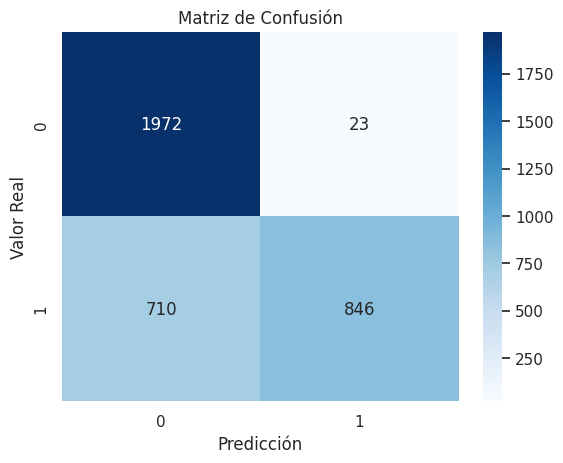

In [355]:
cm = confusion_matrix(y_train, y_pred_tfidf_train)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

In [356]:
# Hacer predicciones en el conjunto de prueba
y_pred_tfidf_test = modelo_tfidf.predict(X_test_tfidf)

# Reporte de clasificación con datos de test
print("Reporte de clasificación con datos de test:")
print(classification_report(y_test, y_pred_tfidf_test))

Reporte de clasificación con datos de test:
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       863
           1       0.88      0.37      0.52       659

    accuracy                           0.70      1522
   macro avg       0.77      0.67      0.65      1522
weighted avg       0.76      0.70      0.67      1522



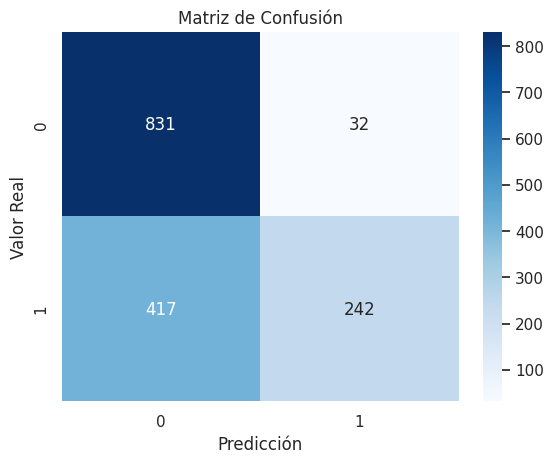

In [357]:
cm = confusion_matrix(y_test, y_pred_tfidf_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Observando el segundo modelo de regresión logistica, usando el TF-IDF, se desarrollo un modelo que aparentemente en la metrica accuracy tiende a tener un menor overfitting, ya que alcanza un 0.79 en los datos de prueba y 0.70 en los datos de testeo

Sin embargo, en lo que concierne a detectar valoraciones positivas, este modelo funciona incluso peor que el anterior, debido a que el recall de las valoraciones positivas alcanza solamente un 0.54 en los datos de entrenamiento, así como un 0.37 en los datos de testeo.

Esto significa que le es muy dificultoso a este modelo detectar las reseñas positivas.

In [358]:
# Obtenemos las palabras del vocabulario
palabras_tf = vectorizador_tfidf.get_feature_names_out()

# Coeficientes del modelo (uno por palabra)
coeficientes_tf = modelo_tfidf.coef_[0]

# Creamos un DataFrame para visualizarlo
df_coef = pd.DataFrame({'palabra': palabras_tf, 'coeficiente': coeficientes_tf})

# Ordenamos por importancia
df_coef = df_coef.sort_values(by='coeficiente', ascending=False)

# Mostramos las 10 palabras más asociadas a valoración positiva y negativa
print("🔼 Palabras más asociadas a reseñas positivas:")
print(df_coef.head(10))

print("\n🔽 Palabras más asociadas a reseñas negativas:")
print(df_coef.tail(10))

🔼 Palabras más asociadas a reseñas positivas:
            palabra  coeficiente
4664         bayona     1.081122
16139     excelente     0.886822
35477     sorogoyen     0.874559
31624  recomendable     0.836181
19476      historia     0.831295
33280        ripley     0.765456
17472         forma     0.740456
22487        karate     0.697939
2392      animación     0.666330
39691        zahera     0.599029

🔽 Palabras más asociadas a reseñas negativas:
         palabra  coeficiente
6163      carece    -0.523815
34354  sensación    -0.555586
25200    minutos    -0.581147
15158    escenas    -0.623722
35067     snyder    -0.624721
37549      trama    -0.640755
26317    netflix    -0.668039
18799      guión    -0.674180
30263   producto    -0.677548
372     aburrida    -0.725103


Al igual que en el modelo anterior, tenemos palabras que no tienen necesariamente que ver con reseñas positivas o negativas, como "Bayona", "Sorogoyen", "historia", "Ripley", "Karate", "Animación", "Zahera", "sensación", "guión", "snyder", "producto".

Aunque es altamente sugestivo que netflix suele estar asociado a reseñas negativas para el modelo de TF-IDF.

In [359]:
#Prueba con reseña positiva

reseña_3 = "Es una gran serie, con buenos personajes, una historia divertida"
nueva_reseña_tf_idf_1 = vectorizador_tfidf.transform([reseña_3])
prediccion_3 = modelo_tfidf.predict(nueva_reseña_tf_idf_1)

# Obtener la probabilidad de la predicción
prob_positiva = modelo_tfidf.predict_proba(nueva_reseña_tf_idf_1)

# Obtener la probabilidad en la clase predicha (0 o 1)
probabilidad = prob_positiva[0][1]  # Probabilidad de la clase "positivo"

print(f"Se predice que la crítica es de caracter {prediccion_3[0]}")
print(f" con una probabilidad de que sea positiva de {probabilidad:.2f}")

Se predice que la crítica es de caracter 0
 con una probabilidad de que sea positiva de 0.47


In [360]:
#Prueba con reseña negativa

reseña_4 = "Es una película pesima, personajes aburridos y previsibles"  # Reemplaza con la reseña que deseas probar
nueva_reseña_tf_idf_2 = vectorizador_tfidf.transform([reseña_4])
prediccion_4 = modelo_tfidf.predict(nueva_reseña_tf_idf_2)

# Obtener la probabilidad de la predicción
prob_negativa = modelo_tfidf.predict_proba(nueva_reseña_tf_idf_2)

# Obtener la probabilidad en la clase predicha (0 o 1)
probabilidad = prob_negativa[0][1]  # Probabilidad de la clase "positivo"

print(f"Se predice que la crítica es de caracter {prediccion_4[0]}")
print(f" con una probabilidad de que sea positiva de {probabilidad:.2f}")

Se predice que la crítica es de caracter 0
 con una probabilidad de que sea positiva de 0.41


Como sucedió como el modelo de regresión logistica combinado con el Bag of Words, se observa que el modelo no puede detectar adecuadamente una reseña positiva.

Sin embargo, puede detectar adecuadamente la reseña negativa e incluso le da menos probabilidad que el modelo anterior de pertenecer a una reseña negativa.

# **Conclusiones**

Como conclusión de este Notebook, se puede decir que se han detectado ciertos patrones a la hora del análisis de los datos.

En primer lugar, **se ha observado cierta conveniencia para apostar por series y películas de comedia o del género fantástico, así como la conveniencia de invertir para tener una importante cantidad de series o películas animadas (entre las cuales se puede incluir el anime japonés)**, que tienden a tener una mayor aprobación que otro tipo de series y películas.

**Si bien cabe rechazar la hipótesis desde la cual se inicio este notebook**, pues no se ha comprobado que **el género dramatico** tenga mejores calificaciones que otros géneros, si es posible decir que este género **tiene cerca de un 50% de sus reseñas aprobadas por la crítica, por lo cual apostar en este género no sería inadecuado**.

Además, luego del análisis desarrollado, **se puede recomendar no invertir en películas o series de terror**, ya que resulta hartamente dificultoso que tengan una reseña positiva, posiblemente por la dificultad de efectuar adecuadamente este tipo de contenidos.

Además, a lo largo del análisis **se ha podido observar el peso de ciertos directores, de los cuales sería recomendable tener su contenido para congraciarse con el público de habla española** que realiza estas reseñas, con el fin de fidelizarlos como público.

Con respecto a los límites de este notebook, **es evidente que se necesitarán más reseñas para mejorar la eficacia de los dos modelos de regresión logistica utilizados**, los cuales presentaron un importante overfitting así como también tuvieron problemas para poder detectar las reseñas positivas adecuadamente.

Además, quizás **habría que seguir eliminando palabras inadecuadas de la tokenización**, con el fin de quedarse solamente con palabras que denoten una actitud positiva o negativa con respecto a las películas y de esa manera poder mejorar la precisión de un modelo de Machine Learning